In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the application_data csv file
appl = pd.read_csv("application_data.csv")

In [3]:
appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Get the shape of the dataset
appl.shape

(307511, 122)

In [5]:
#Get column wise info of the dataset
appl.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
# Get the percentage of null values in each column
appl.isnull().sum() * 100/len(appl)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

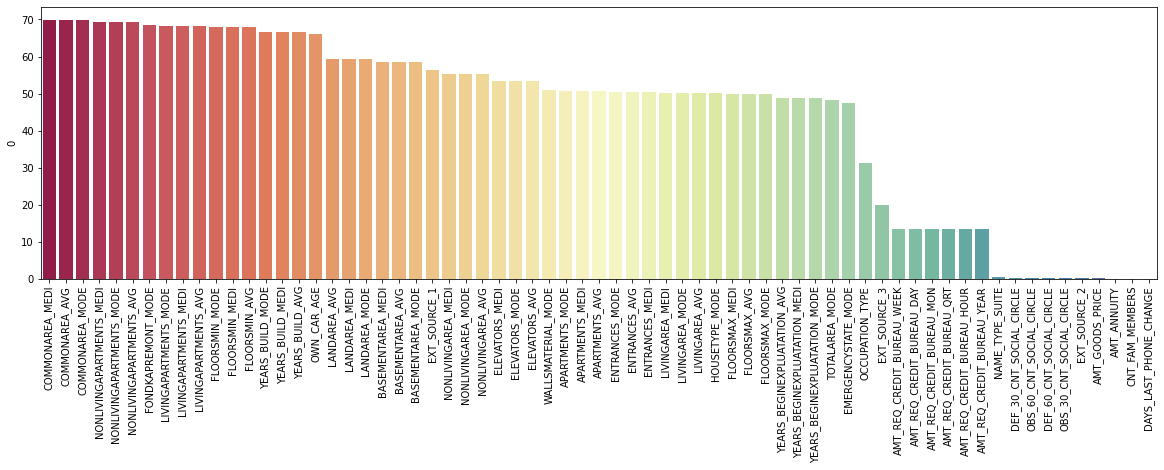

In [7]:
#Plotting columns with percentage of null values
nulls_appl = (appl.isnull().sum()* 100/len(appl)).to_frame()
nulls_appl = nulls_appl[nulls_appl[0]>0]
nulls_appl.sort_values(by=0,ascending=False,inplace=True)
plt.figure(figsize=[20,5])
barp = sns.barplot(data=nulls_appl,x=nulls_appl.index,y=nulls_appl[0],palette="Spectral")
for item in barp.get_xticklabels():
    item.set_rotation(90)

In [8]:
# Dropping columns which have null values more than 40%
appl.drop(nulls_appl[nulls_appl[0]>40].index,axis=1,inplace=True)

In [9]:
# Getting information about remaining columns
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
# Get the Categorical and Numerical features
num_features = appl.describe().columns.values
cat_features = np.array(list(set(appl.columns) - set(num_features)))

## Treating missing values one by one

### Treating missing values of categorical features

In [11]:
#Code_Gender
appl["CODE_GENDER"].value_counts()

#XNA can be regarded as missing values. We can drop these records as they are very negligible as compared to total records
appl = appl[appl["CODE_GENDER"]!="XNA"]
appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

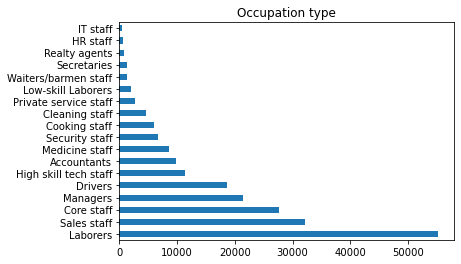

In [12]:
#Occupation type
appl["OCCUPATION_TYPE"].isnull().sum()
appl["OCCUPATION_TYPE"].value_counts().plot.barh()
plt.title("Occupation type")
plt.show()

#Though there are large number of records with missing values in this column, since occupation type is an important parameter looking at the data, we keep it as missing and won't affect the calculation

### Treating missing values of numerical features

In [13]:
#EXT_SOURCES
appl[appl.columns[appl.columns.str.startswith("EXT")]].isnull().sum() * 100/len(appl)

EXT_SOURCE_2     0.214629
EXT_SOURCE_3    19.825565
dtype: float64

0

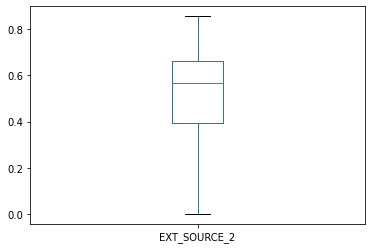

In [14]:
#EXT_SOURCE_2
appl.EXT_SOURCE_2.isnull().sum()
appl.EXT_SOURCE_2.describe()
appl.EXT_SOURCE_2.plot.box()

#Since it has no outliers. We can either impute it with mean or median values as it won't affect our analysis.
#Let's impute with median values
appl.EXT_SOURCE_2.fillna(appl.EXT_SOURCE_2.median(),inplace=True)
appl.EXT_SOURCE_2.isnull().sum()

In [15]:
#EXT_SOURCE_3
appl.EXT_SOURCE_3.isnull().sum()

# Since a lot of values are missing, it doesn't make sense to drop these records or impute it with mean/median. We will treat it as missing only.

60965

In [16]:
#AMT_ANNUITY
appl.AMT_ANNUITY.isnull().sum()

# Since we don't have a lot of records with the missing values as compared to the total records. We can drop these records.
appl.dropna(subset=['AMT_ANNUITY'],inplace=True)
appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307495 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307495 non-null  int64  
 1   TARGET                       307495 non-null  int64  
 2   NAME_CONTRACT_TYPE           307495 non-null  object 
 3   CODE_GENDER                  307495 non-null  object 
 4   FLAG_OWN_CAR                 307495 non-null  object 
 5   FLAG_OWN_REALTY              307495 non-null  object 
 6   CNT_CHILDREN                 307495 non-null  int64  
 7   AMT_INCOME_TOTAL             307495 non-null  float64
 8   AMT_CREDIT                   307495 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307217 non-null  float64
 11  NAME_TYPE_SUITE              306203 non-null  object 
 12  NAME_INCOME_TYPE             307495 non-null  object 
 13 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307217 non-null  int64  
 1   TARGET                       307217 non-null  int64  
 2   NAME_CONTRACT_TYPE           307217 non-null  object 
 3   CODE_GENDER                  307217 non-null  object 
 4   FLAG_OWN_CAR                 307217 non-null  object 
 5   FLAG_OWN_REALTY              307217 non-null  object 
 6   CNT_CHILDREN                 307217 non-null  int64  
 7   AMT_INCOME_TOTAL             307217 non-null  float64
 8   AMT_CREDIT                   307217 non-null  float64
 9   AMT_ANNUITY                  307217 non-null  float64
 10  AMT_GOODS_PRICE              307217 non-null  float64
 11  NAME_TYPE_SUITE              306203 non-null  object 
 12  NAME_INCOME_TYPE             307217 non-null  object 
 13 

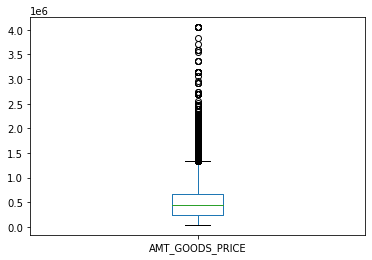

In [17]:
#AMT_GOODS_PRICE
appl.AMT_GOODS_PRICE.isnull().sum()
appl.AMT_GOODS_PRICE.plot.box()

#Since the records with missing values are too less as compared to the total records, we can drop these records.
appl.dropna(subset=['AMT_GOODS_PRICE'],inplace=True)
appl.info()

In [18]:
#AMT_REQ_CREDIT_BUREAU_* columns
appl[appl.columns[appl.columns.str.startswith("AMT_REQ_CREDIT_BUREAU_")]].isnull().sum()

# AMT_REQ_CREDIT_BUREAU_* columns are important as too many enquiries mean the client is a high risk borrower. We won't drop
# the columns. Also since missing records are too many and imputing it may distort our as a high risk borrower if imputed as
# a client who has mean/median enquiries will result into wrong analysis

# Hence we will treat them as missing only.

AMT_REQ_CREDIT_BUREAU_HOUR    41472
AMT_REQ_CREDIT_BUREAU_DAY     41472
AMT_REQ_CREDIT_BUREAU_WEEK    41472
AMT_REQ_CREDIT_BUREAU_MON     41472
AMT_REQ_CREDIT_BUREAU_QRT     41472
AMT_REQ_CREDIT_BUREAU_YEAR    41472
dtype: int64

In [19]:
# Checking null values once again to be sure.
appl.info()

#Null values for other columns are not treated as they will be removed altogether while removing redundant columns itself

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307217 non-null  int64  
 1   TARGET                       307217 non-null  int64  
 2   NAME_CONTRACT_TYPE           307217 non-null  object 
 3   CODE_GENDER                  307217 non-null  object 
 4   FLAG_OWN_CAR                 307217 non-null  object 
 5   FLAG_OWN_REALTY              307217 non-null  object 
 6   CNT_CHILDREN                 307217 non-null  int64  
 7   AMT_INCOME_TOTAL             307217 non-null  float64
 8   AMT_CREDIT                   307217 non-null  float64
 9   AMT_ANNUITY                  307217 non-null  float64
 10  AMT_GOODS_PRICE              307217 non-null  float64
 11  NAME_TYPE_SUITE              306203 non-null  object 
 12  NAME_INCOME_TYPE             307217 non-null  object 
 13 

## Removing unnecessary/redundant columns

In [20]:
# FLAG DOCUMENTS columns are removed as we have no information about these documents mentioned
# Columns related to Social circle shouldn't affect on the premise of giving the loan to the client.
# Columns related to Email ID, work phone, mobile reachable have no affect as to whether the client is eligible for loan or not.
# ALso it doesn't matter if the client permanent address and work address is different. 
# The Week day and hour of the application add no information to our business objective. 

redundant_columns = ['REGION_POPULATION_RELATIVE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                     'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                     'NAME_TYPE_SUITE','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 
                     'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 
                     'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                     'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
                     'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
appl1 = appl.drop(labels=redundant_columns,axis=1)
appl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307217 non-null  int64  
 1   TARGET                       307217 non-null  int64  
 2   NAME_CONTRACT_TYPE           307217 non-null  object 
 3   CODE_GENDER                  307217 non-null  object 
 4   FLAG_OWN_CAR                 307217 non-null  object 
 5   FLAG_OWN_REALTY              307217 non-null  object 
 6   CNT_CHILDREN                 307217 non-null  int64  
 7   AMT_INCOME_TOTAL             307217 non-null  float64
 8   AMT_CREDIT                   307217 non-null  float64
 9   AMT_ANNUITY                  307217 non-null  float64
 10  AMT_GOODS_PRICE              307217 non-null  float64
 11  NAME_INCOME_TYPE             307217 non-null  object 
 12  NAME_EDUCATION_TYPE          307217 non-null  object 
 13 

## Standardizing values

In [21]:
# Converting categorical FLAG_OWN_CAR to numerical for easy analysis
appl1.FLAG_OWN_CAR.value_counts()
appl1.FLAG_OWN_CAR = appl1.FLAG_OWN_CAR.apply(lambda x: 1 if x=="Y" else 0)
appl1.FLAG_OWN_CAR.value_counts()

0    202635
1    104582
Name: FLAG_OWN_CAR, dtype: int64

In [22]:
# Converting categorical FLAG_OWN_REALTY to numerical for easy analysis
appl1.FLAG_OWN_REALTY.value_counts()
appl1.FLAG_OWN_REALTY = appl1.FLAG_OWN_REALTY.apply(lambda x: 1 if x=="Y" else 0)
appl1.FLAG_OWN_REALTY.value_counts()

1    213082
0     94135
Name: FLAG_OWN_REALTY, dtype: int64

In [23]:
#More than 5 kids seems like outliers. Will be handled when Handling outliers
appl1.CNT_CHILDREN.value_counts()

0     215180
1      61050
2      26723
3       3711
4        427
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [24]:
# We can do "Single / not married" to Unmarried
appl1.NAME_FAMILY_STATUS = appl1.NAME_FAMILY_STATUS.replace(to_replace = "Single / not married", value = "Unmarried")
appl1.NAME_FAMILY_STATUS.value_counts()

Married           196255
Unmarried          45383
Civil marriage     29748
Separated          19757
Widow              16074
Name: NAME_FAMILY_STATUS, dtype: int64

In [25]:
appl1.DAYS_BIRTH.describe()

#Since these are negative and in days, this is a very bad representation of client's age. Converted to age in years. Leap years are ignored.
appl1.DAYS_BIRTH = appl1.DAYS_BIRTH.abs()/365.0
appl1.DAYS_BIRTH.describe()

count    307217.000000
mean         43.941971
std          11.955744
min          20.517808
25%          34.013699
50%          43.158904
75%          53.928767
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [26]:
appl1.DAYS_EMPLOYED.describe()

# It seems that if the person is unemployed then the default value put is 365243. We can replace it with NaN values which means that the person hasn't been employed ever. 
appl1.loc[appl1.DAYS_EMPLOYED == 365243,"DAYS_EMPLOYED"] = np.NaN
appl1.DAYS_EMPLOYED.describe()


# Since this column is negative and in days, it is a bad representation of client's employment. Converted to years
appl1.DAYS_EMPLOYED = appl1.DAYS_EMPLOYED.abs()/365.0
appl1.DAYS_EMPLOYED.describe()
#appl1.info()

count    251865.000000
mean          6.532276
std           6.406898
min           0.000000
25%           2.101370
50%           4.515068
75%           8.701370
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [27]:
appl1.DAYS_REGISTRATION.describe()

# Since this column is negative and in days, it is a bad representation. Converted to years
appl1.DAYS_REGISTRATION = appl1.DAYS_REGISTRATION.abs()/365.0
appl1.DAYS_REGISTRATION.describe()


count    307217.000000
mean         13.661203
std           9.652428
min           0.000000
25%           5.506849
50%          12.339726
75%          20.493151
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [28]:
appl1.DAYS_ID_PUBLISH.describe()

# Since this column is negative and in days, it is a bad representation. Converted to years
appl1.DAYS_ID_PUBLISH = appl1.DAYS_ID_PUBLISH.abs()/365.0
appl1.DAYS_ID_PUBLISH.describe()

count    307217.000000
mean          8.203790
std           4.135303
min           0.000000
25%           4.712329
50%           8.917808
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [29]:
appl1.ORGANIZATION_TYPE.value_counts()

#XNA should be treated as missing values. Since the missing value records are a bit high, we will just treat it as missing
appl1.loc[appl1.ORGANIZATION_TYPE == "XNA","ORGANIZATION_TYPE"] = np.NaN
appl1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
Self-employed             38357
Other                     16667
Medicine                  11180
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6871
Construction               6714
Business Entity Type 1     5980
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3275
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transport: type 3          1185
Industry

### Handling outliers

In [30]:
appl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307217 non-null  int64  
 1   TARGET                       307217 non-null  int64  
 2   NAME_CONTRACT_TYPE           307217 non-null  object 
 3   CODE_GENDER                  307217 non-null  object 
 4   FLAG_OWN_CAR                 307217 non-null  int64  
 5   FLAG_OWN_REALTY              307217 non-null  int64  
 6   CNT_CHILDREN                 307217 non-null  int64  
 7   AMT_INCOME_TOTAL             307217 non-null  float64
 8   AMT_CREDIT                   307217 non-null  float64
 9   AMT_ANNUITY                  307217 non-null  float64
 10  AMT_GOODS_PRICE              307217 non-null  float64
 11  NAME_INCOME_TYPE             307217 non-null  object 
 12  NAME_EDUCATION_TYPE          307217 non-null  object 
 13 

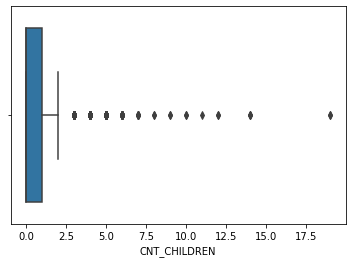

In [31]:
sns.boxplot(x=appl1.CNT_CHILDREN)
appl1.CNT_CHILDREN.quantile([0.5,0.7,0.9,0.95,0.99])

# Records with children >= 5 seems like outliers. We will bin them. Count of children greater than or equal to 5 will be put in 5 and above range
bins = [0,1,2,3,4,5,20]
labels = ["0-1","1-2","2-3","3-4","4-5","5 and above"]
appl1["CNT_CHILDREN_range"] = pd.cut(appl1.CNT_CHILDREN,bins,labels=labels,right=False,include_lowest=True)

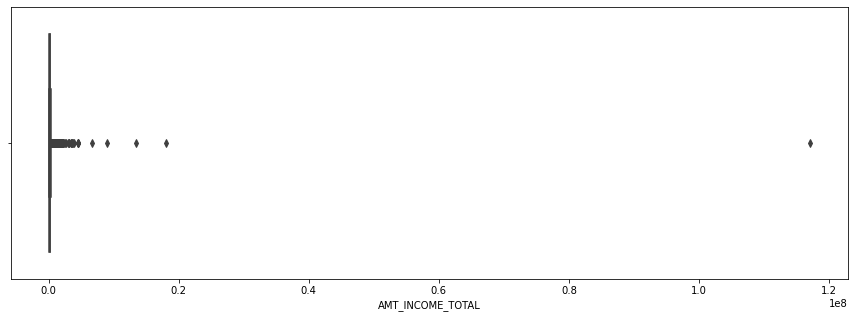

In [32]:
plt.figure(figsize=[15,5])
sns.boxplot(x = appl1.AMT_INCOME_TOTAL)
appl1[appl1.AMT_INCOME_TOTAL>5000000]
# The 1 extreme outlier that we have is a client with highest income but having difficulty in paying a small amount of loan. This is a very unusual case and hence needs to be removed from the data.
appl1 = appl1[~(appl1.AMT_INCOME_TOTAL>20000000)]

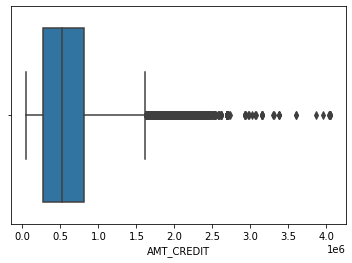

In [33]:
sns.boxplot(x=appl1.AMT_CREDIT)
# Continuous chunk of outliers. Nothing to do

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_range
17948,120926,0,Cash loans,M,1,0,2,783000.0,4050000.0,258025.5,...,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,0.0,0.0,2-3


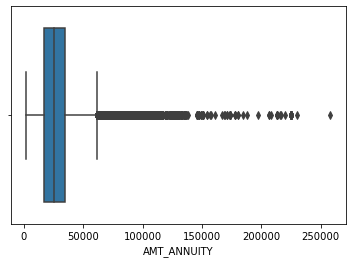

In [34]:
sns.boxplot(x=appl1.AMT_ANNUITY)

# Continuous chunk of outliers. Nothing to do
appl1[appl1.AMT_ANNUITY>250000]

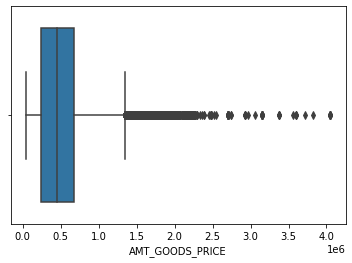

In [35]:
sns.boxplot(x=appl1.AMT_GOODS_PRICE)
plt.show()
# Continuous chunk of outliers. Nothing to do



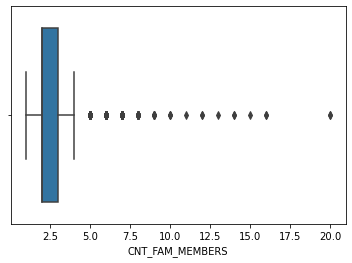

In [36]:
sns.boxplot(x=appl1.CNT_FAM_MEMBERS)

# Family members >= 7 seems like outliers. We will bin them.
bins = [1,2,3,4,5,6,7,21]
labels = ["1-2","2-3","3-4","4-5","5-6","6-7","7 and above"]
appl1["CNT_FAM_MEMBERS_range"] = pd.cut(appl1.CNT_FAM_MEMBERS,bins,labels=labels,right=False,include_lowest=True)

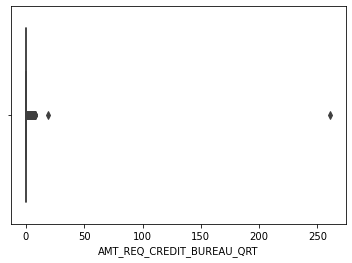

In [37]:
sns.boxplot(x=appl1.AMT_REQ_CREDIT_BUREAU_QRT)
appl1[appl1.AMT_REQ_CREDIT_BUREAU_QRT>250]

#AMT_REQ_CREDIT_BUREAU_QRT is an important attribute that directly affects the credit score. More number of inquiries(hard) 
# results into lowering of credit score. The clients are deemed as high risk borrowers. If we analyse, the outlier has a 
#TARGET value 0 which means the client is able to pay the amount on time.This is a one-off case for such event and hence it
#will be useful to remove this outlier. 
appl1 = appl1[~(appl1.AMT_REQ_CREDIT_BUREAU_QRT>250)]

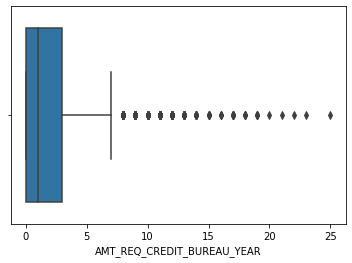

In [38]:
sns.boxplot(x=appl1.AMT_REQ_CREDIT_BUREAU_YEAR)
# Seems like the outliers are continuous in some sense. Nothing to do.

## Sanity checks

In [39]:
appl1[appl1.CNT_CHILDREN>appl1.CNT_FAM_MEMBERS]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_range,CNT_FAM_MEMBERS_range


In [40]:
appl1[appl1.DAYS_EMPLOYED>appl1.DAYS_BIRTH]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_range,CNT_FAM_MEMBERS_range


In [41]:
appl1[appl1.DAYS_REGISTRATION>appl1.DAYS_BIRTH]
# This is an invalid record. DAYS_REGISTRATION can't be more than a person's age. Removing the record
appl1 = appl1[~(appl1.DAYS_REGISTRATION>appl1.DAYS_BIRTH)]

In [42]:
appl1[appl1.DAYS_ID_PUBLISH>appl1.DAYS_BIRTH]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_range,CNT_FAM_MEMBERS_range


In [43]:
appl1[appl1.AMT_CREDIT<appl1.AMT_ANNUITY]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_range,CNT_FAM_MEMBERS_range


In [44]:
appl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307214 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307214 non-null  int64   
 1   TARGET                       307214 non-null  int64   
 2   NAME_CONTRACT_TYPE           307214 non-null  object  
 3   CODE_GENDER                  307214 non-null  object  
 4   FLAG_OWN_CAR                 307214 non-null  int64   
 5   FLAG_OWN_REALTY              307214 non-null  int64   
 6   CNT_CHILDREN                 307214 non-null  int64   
 7   AMT_INCOME_TOTAL             307214 non-null  float64 
 8   AMT_CREDIT                   307214 non-null  float64 
 9   AMT_ANNUITY                  307214 non-null  float64 
 10  AMT_GOODS_PRICE              307214 non-null  float64 
 11  NAME_INCOME_TYPE             307214 non-null  object  
 12  NAME_EDUCATION_TYPE          307214 non-null

## Checking Data Imbalance

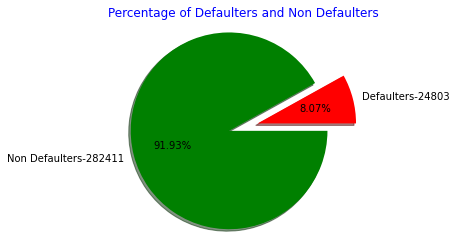

In [45]:
# Considering the TARGET variable
pie_labels=['Defaulters-'+str(appl1['TARGET'][appl1.TARGET==1].count()),'Non Defaulters-'+str(appl1['TARGET'][appl1.TARGET==0].count())]
pie_share=[appl1['TARGET'][appl1.TARGET==1].count()/appl1['TARGET'].count(),
           appl1['TARGET'][appl1.TARGET==0].count()/appl1['TARGET'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Defaulters and Non Defaulters',color='blue')
plt.show()

- Data is imbalanced
- Imbalanced dataset is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes.
- For further analysis, we will divide the data into 2 parts target0 and target1. We can do analysis separately for these 2 subsets of data.

In [46]:
target0 = appl1[appl1.TARGET==0]
target1 = appl1[appl1.TARGET==1]

## Univariate Analysis

### Univariate Analysis of categorical columns

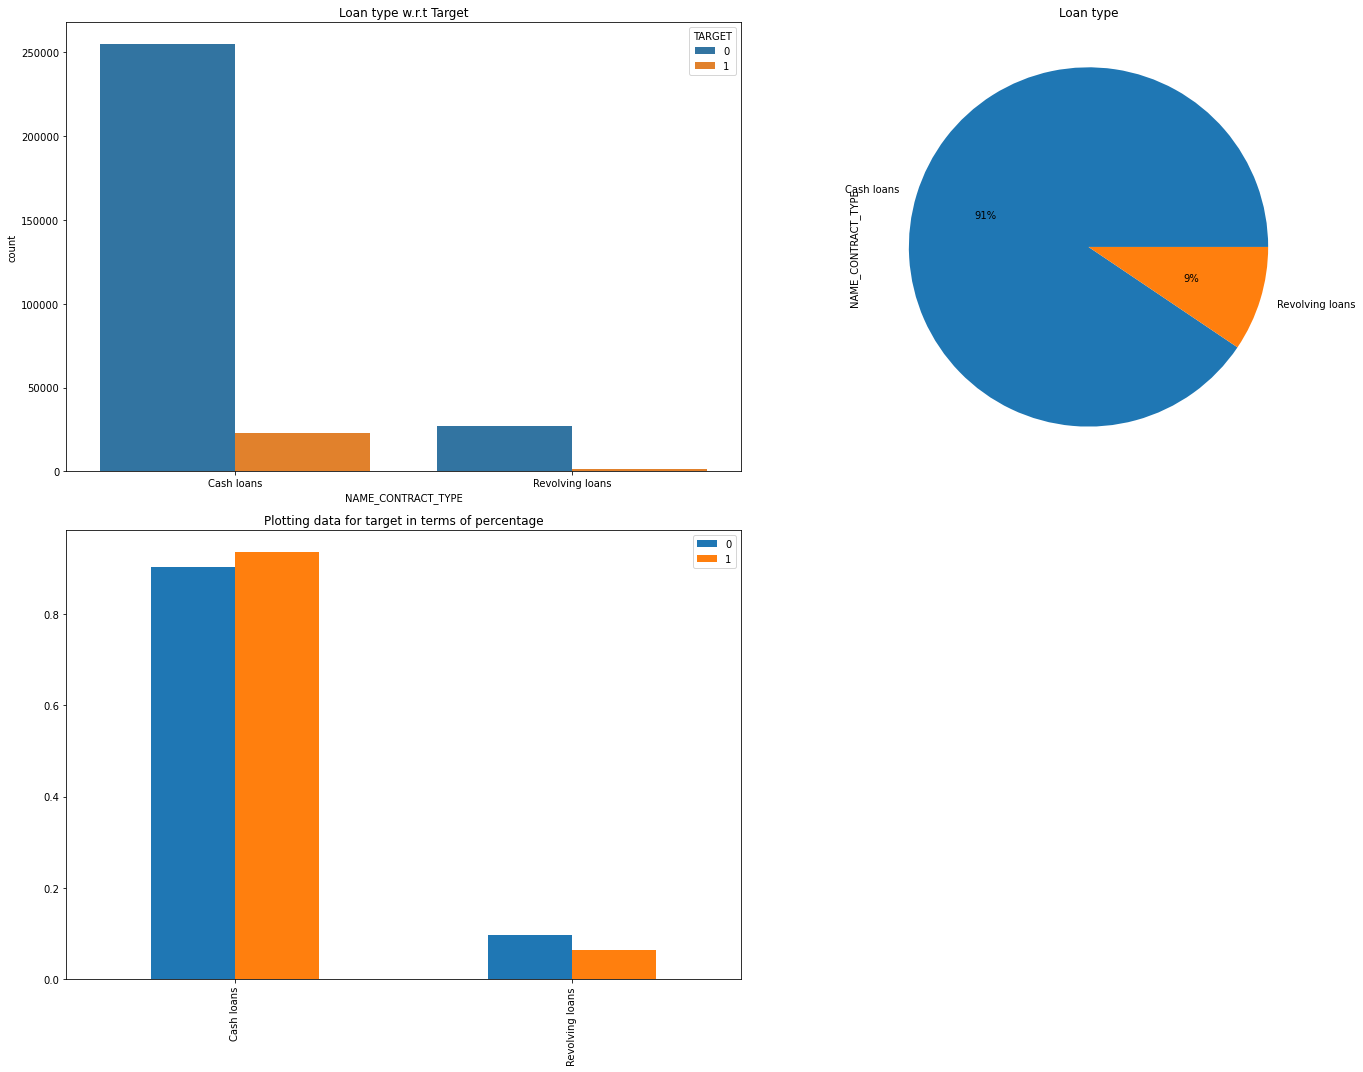

In [47]:
fig = plt.figure(figsize=[20,15])
ax1 = plt.subplot(2,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=appl1, ax=ax1)
plt.title("Loan type w.r.t Target")

ax2 = plt.subplot(2,2,2)
appl1.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",ax=ax2)
plt.title("Loan type")

df = pd.DataFrame()
df['0']= (target0.NAME_CONTRACT_TYPE.value_counts())/len(target0)
df['1']= (target1.NAME_CONTRACT_TYPE.value_counts())/len(target1)

ax3 = plt.subplot(2,2,3)
df.plot.bar(ax=ax3)
plt.title('Plotting data for target in terms of percentage')

fig.tight_layout()

plt.show()

In [48]:
df

,0,1
Cash loans,0.902929,0.936177
Revolving loans,0.097071,0.063823


- Cash loans taken are more than revolving loans.
- Amongst the customers who have difficulty in paying on time, the cash loans are at a higher percentage than for those customers who pay on time. It can probably be because revolving loans are flexible financing tools due to its repayment and re-borrowing accommodations and hence lower percentage of revolving loans in case of defaulting customers

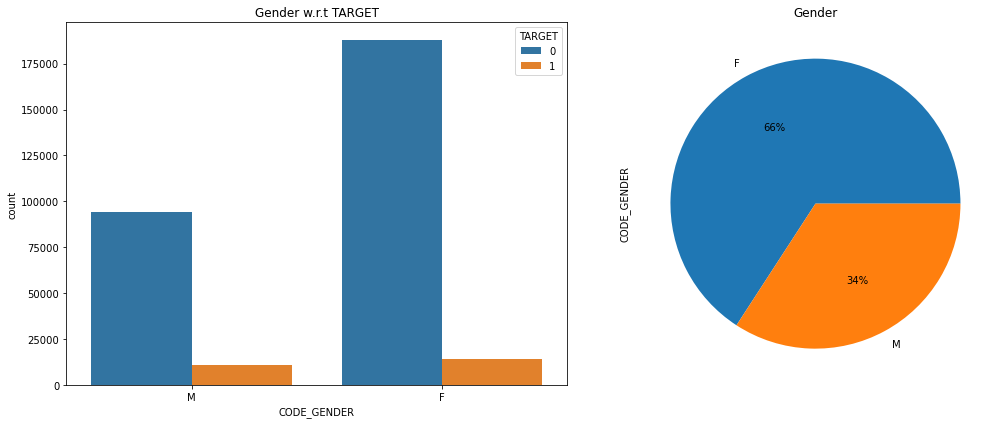

In [49]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="CODE_GENDER", hue="TARGET", data=appl1)
plt.title("Gender w.r.t TARGET")

plt.subplot(1,2,2)
appl1.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Gender")

plt.tight_layout()

plt.show()

- In this data, females have taken more loans than males.
- Females in general pay installments on time than the males.

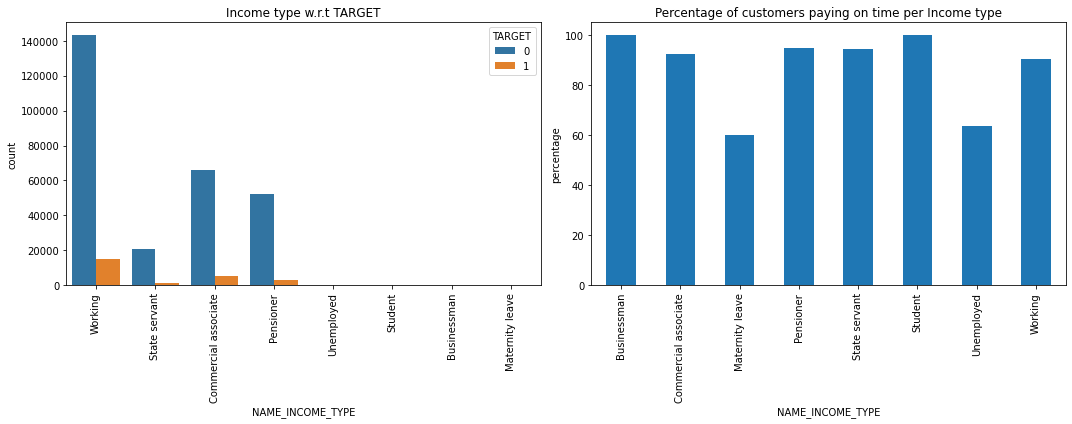

In [50]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Income type w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].NAME_INCOME_TYPE.value_counts() * 100/appl1.NAME_INCOME_TYPE.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per Income type")
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("percentage")

plt.tight_layout()

plt.show()

- Working, commercial associate and pensioners tend to take more loans as implied in this data
- Businessman and Students have highest percentage in terms of paying on time while maternity leave and unemployed customers have lowest percentages. This may so happen because since they are unemployed or on maternity leave they might not be earning much and hence difficulty in paying on time.

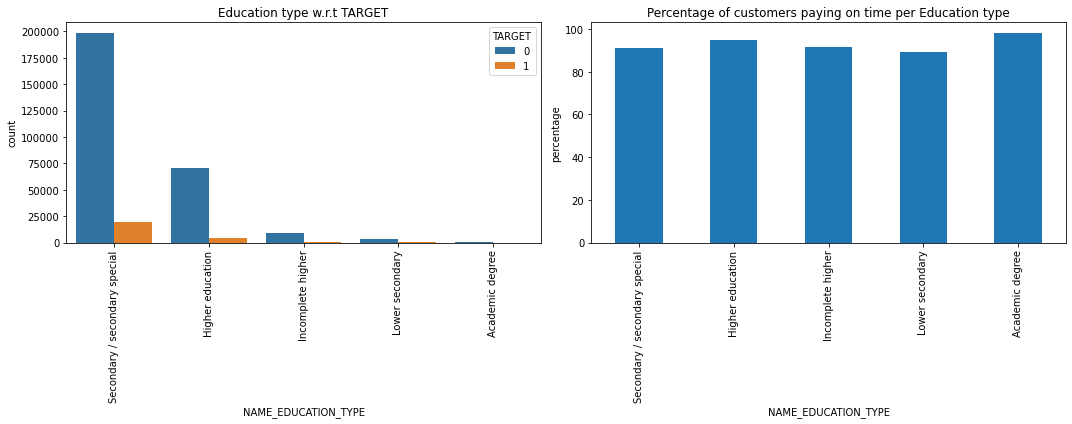

In [51]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Education type w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].NAME_EDUCATION_TYPE.value_counts() * 100/appl1.NAME_EDUCATION_TYPE.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per Education type")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("percentage")

plt.tight_layout()

plt.show()

- Secondary/ secondary special and Higher education customers have taken more loans.
- If we talk in percentages per education type, Academic degree holders have higher percentage in terms of paying on time whereas lower secondary customers have the lowest percentage in terms of paying on time. 
- This may be because, degree holders might get better jobs and hence higher pay and more chances of paying loans on time. But this is something to be verified. The above can be formed as a hypothesis.

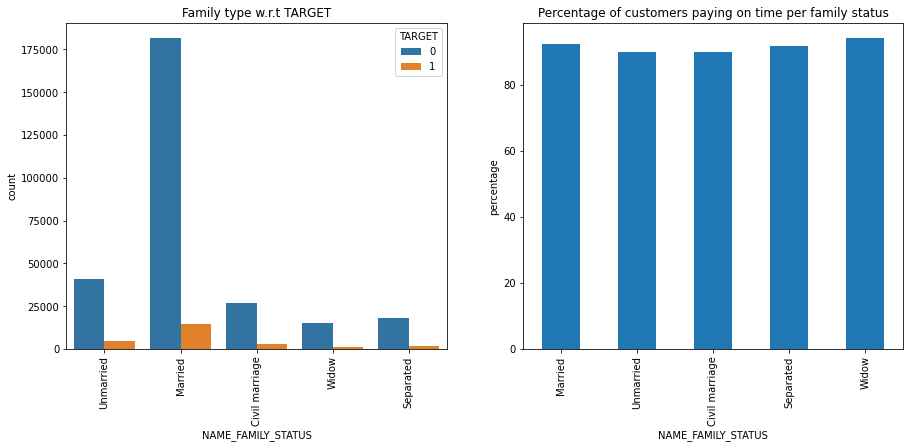

In [52]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Family type w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].NAME_FAMILY_STATUS.value_counts() * 100/appl1.NAME_FAMILY_STATUS.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per family status")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("percentage")

plt.show()

- Married people tend to take more loans than others
- Widows tend to pay on time more than others while civil marriage people the least.

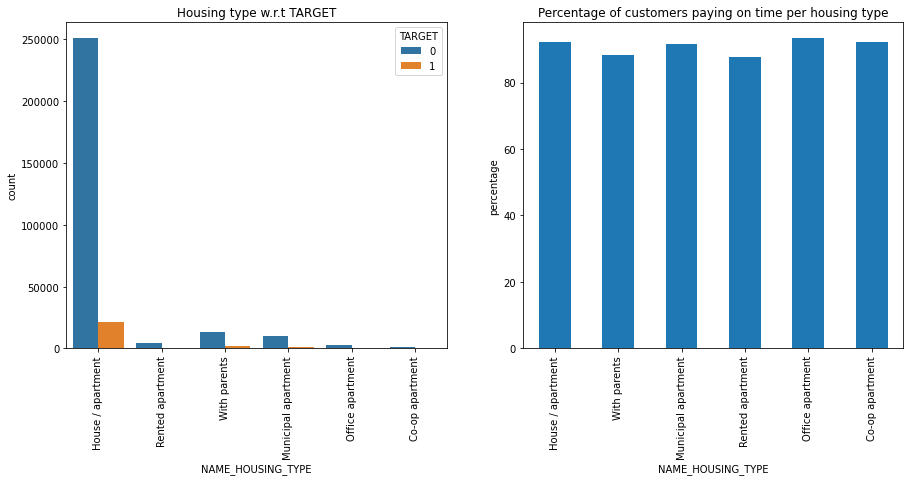

In [53]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="NAME_HOUSING_TYPE", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Housing type w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].NAME_HOUSING_TYPE.value_counts() * 100/appl1.NAME_HOUSING_TYPE.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per housing type")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("percentage")

plt.show()

- Those living in a house/an apartment have taken more loans than others.
- Those living in co-op apartments have least difficulty in paying the loans on time while those living in rented apartments face the most difficulty. 

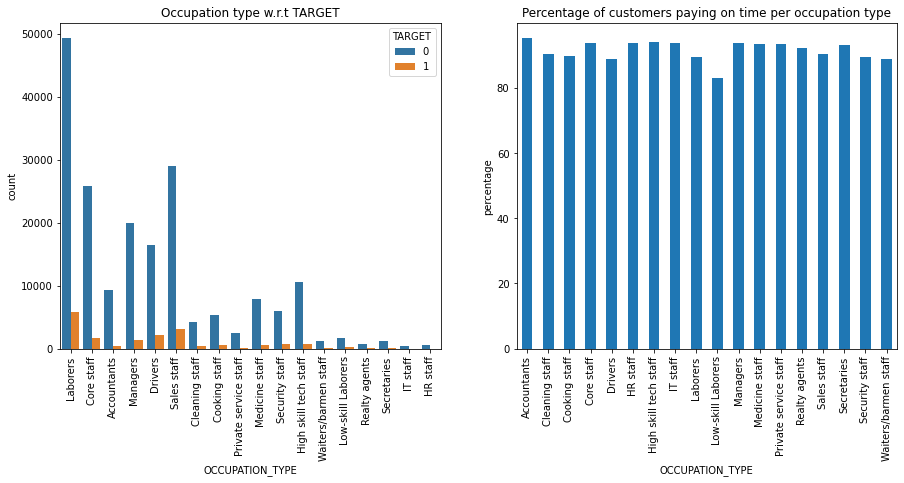

In [54]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Occupation type w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].OCCUPATION_TYPE.value_counts() * 100/appl1.OCCUPATION_TYPE.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per occupation type")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("percentage")

plt.show()

- Labourers and Sales staff have taken more loans.
- Low-skill labourers have most difficulty in paying the loan on time, while Accountants have the least difficulty.

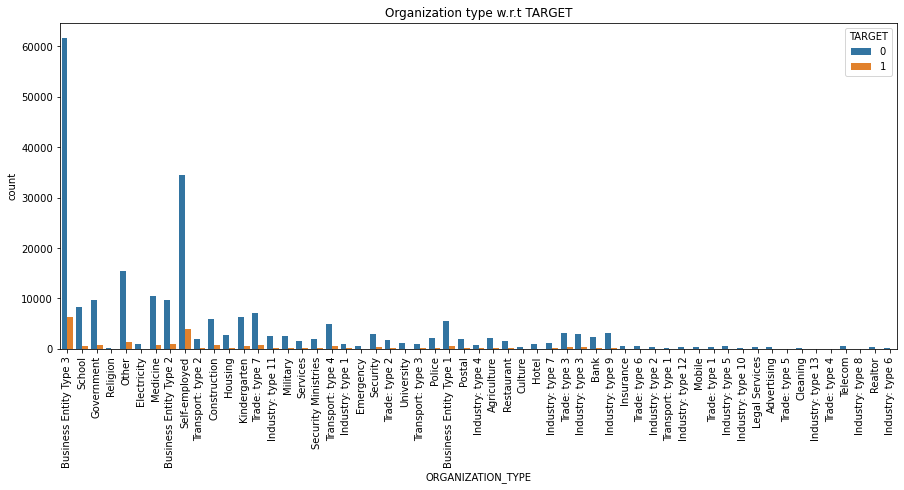

In [55]:
plt.figure(figsize=[15,6])
sns.countplot(x="ORGANIZATION_TYPE", hue="TARGET", data=appl1)
plt.xticks(rotation=90)
plt.title("Organization type w.r.t TARGET")

plt.show()

- Business Entity Type 3 and Self-employed have taken more loans than others.
- For self employed people, capital is a requirement. To fulfill that, loans become more preferrable option.

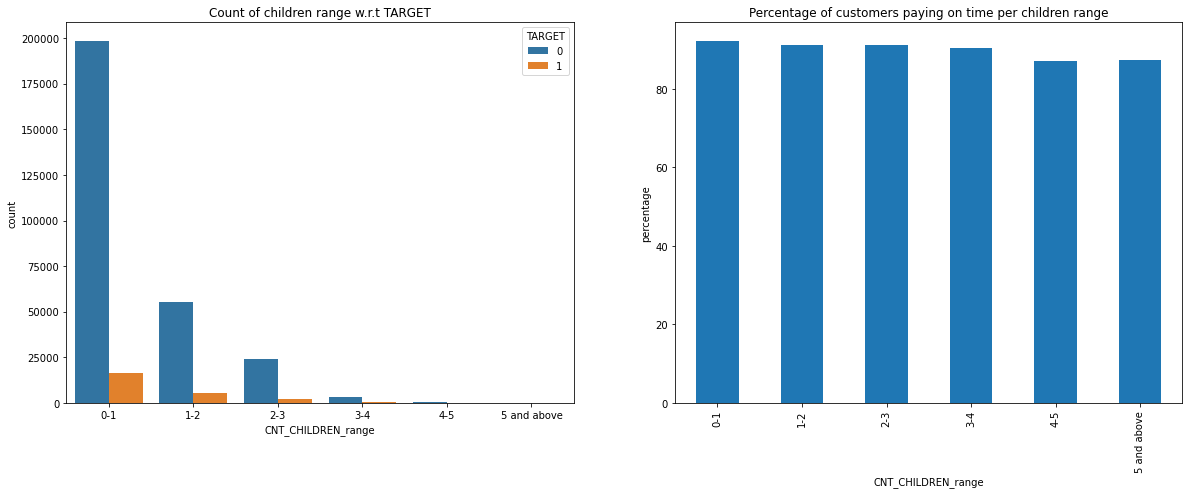

In [56]:
fig = plt.figure(figsize=[20,7])
ax1 = plt.subplot(1,2,1)
sns.countplot(x="CNT_CHILDREN_range", hue="TARGET", data=appl1, ax=ax1)
plt.title("Count of children range w.r.t TARGET")

plt.subplot(1,2,2)
(appl1[appl1.TARGET==0].CNT_CHILDREN_range.value_counts() * 100/appl1.CNT_CHILDREN_range.value_counts()).plot.bar()
plt.title("Percentage of customers paying on time per children range")
plt.xlabel("CNT_CHILDREN_range")
plt.ylabel("percentage")


plt.show()

- People with 0 children have taken more loans and are higher in terms of percentage in terms of paying on time. 
- People with 4 children or 5 and above children have difficulty in paying on time as compared to others.

### Univariate analysis of numerical columns

In [57]:
num_columns = appl1.describe().columns
num_columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

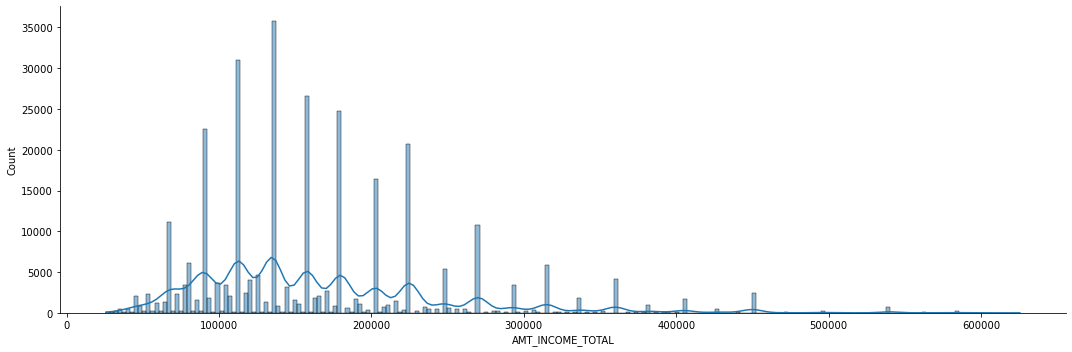

In [58]:
# Restricting values of AMT_INCOME_TOTAL to get better visualisation
pl = pd.DataFrame()
pl["AMT_INCOME_TOTAL"] = appl1[appl1.AMT_INCOME_TOTAL<np.percentile(appl1.AMT_INCOME_TOTAL,99.5)].AMT_INCOME_TOTAL
sns.displot(data=pl,x="AMT_INCOME_TOTAL",kde=True,aspect=3)

plt.show()

- Incomes of most people are in the range 25000-500000.
- There are some peaks in the range 50000-300000 where more people have a particular income. 

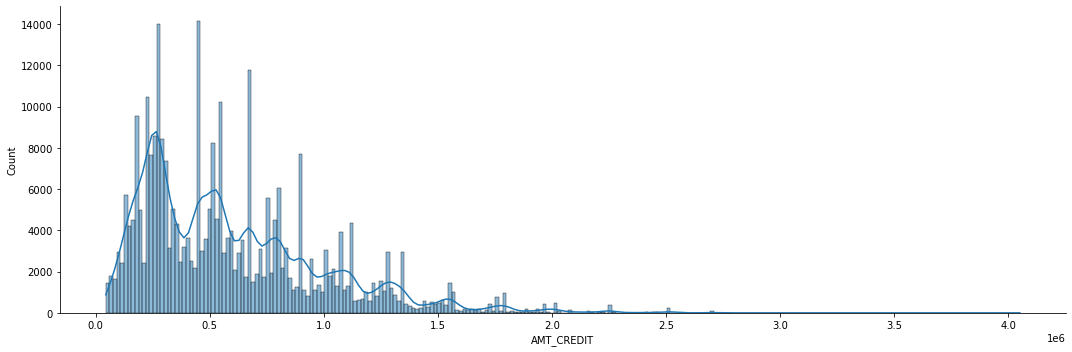

In [59]:
sns.displot(data=appl1,x="AMT_CREDIT",kde=True,aspect=3)
plt.show()

- Credit amount taken by customers mostly lie in the range 45000-20,00,000
- Though people have mostly preferred lower credit amounts.

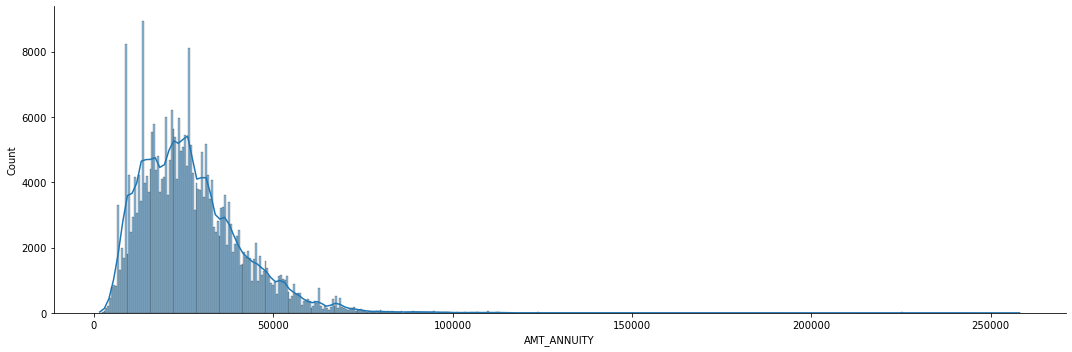

In [60]:
sns.displot(data=appl1,x="AMT_ANNUITY",kde=True,aspect=3)
plt.show()

- AMT_ANNUITY approximately follows a normal distribution.
- Amount to be paid annually lie in the range 1615-70000. 

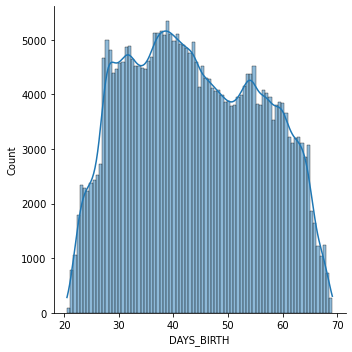

In [61]:
sns.displot(data=appl1,x="DAYS_BIRTH",kde=True)
plt.show()

- The ages of customers almost follow a normal distribution
- We see a decreasing trend of people taking loans between 40-50 years but a small sharp increase after that. 

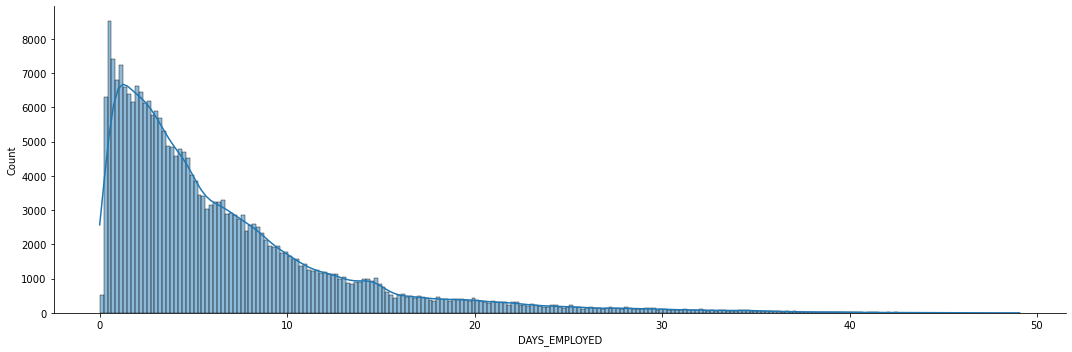

In [62]:
sns.displot(data=appl1,x="DAYS_EMPLOYED",kde=True,aspect=3)
plt.show()

- More people have taken loans at the start of their professional career than in the later stages of their career where they are more settled and hence less need of loans

## Bivariate Analysis

In [63]:
#dividing the total income and credit into bins

bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

target0['INCOME_RANGE'] = pd.cut(target0['AMT_INCOME_TOTAL'],bins,labels=ranges,right=False,include_lowest=True)
target0['CREDIT_RANGE'] = pd.cut(target0['AMT_CREDIT'],bins,labels=ranges,right=False,include_lowest=True)
target1['INCOME_RANGE'] = pd.cut(target1['AMT_INCOME_TOTAL'],bins,labels=ranges,right=False,include_lowest=True)
target1['CREDIT_RANGE'] = pd.cut(target1['AMT_CREDIT'],bins,labels=ranges,right=False,include_lowest=True)

appl1['INCOME_RANGE'] = pd.cut(appl1['AMT_INCOME_TOTAL'],bins,labels=ranges,right=False,include_lowest=True)
appl1['CREDIT_RANGE'] = pd.cut(appl1['AMT_CREDIT'],bins,labels=ranges,right=False,include_lowest=True)

### Bivariate Analysis of numerical columns

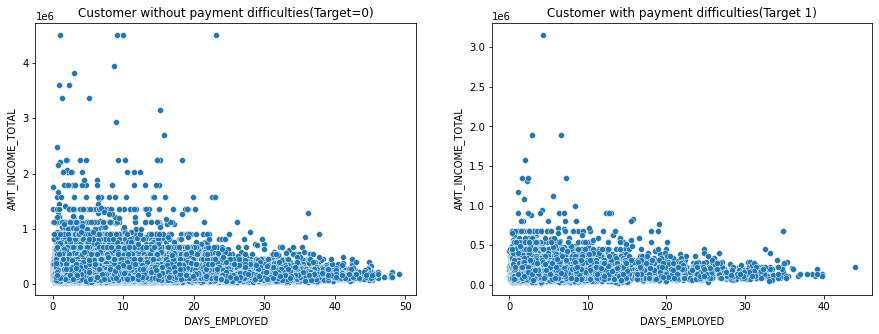

In [64]:
#TOTAL INCOME V/S DAYS EMPLOYED
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=target0[target0.AMT_INCOME_TOTAL<5000000],x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties(Target=0)')

plt.subplot(1,2,2)
sns.scatterplot(data=target1[target1.AMT_INCOME_TOTAL<5000000], x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties(Target 1)')
plt.show()

- In general, Customers without having payment difficulties have more income than customers having payment dfficulties.
- For customers with more than 40 years of work experience, they usually don't have any diffculty in paying their loans.


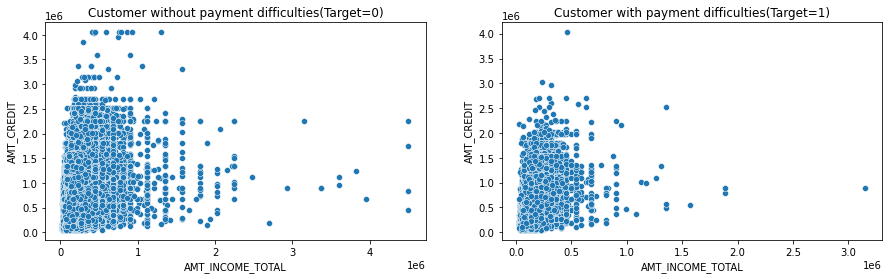

In [65]:
#AMT_GOODS_PRICE V/S AMT_CREDIT
plt.figure(figsize=(15,4)) 

plt.subplot(1,2,1)
sns.scatterplot(data=target0[target0.AMT_INCOME_TOTAL<5000000],x='AMT_INCOME_TOTAL',y='AMT_CREDIT')
plt.title('Customer without payment difficulties(Target=0)')

plt.subplot(1,2,2)
sns.scatterplot(data=target1[target1.AMT_INCOME_TOTAL<5000000],x='AMT_INCOME_TOTAL',y='AMT_CREDIT')
plt.title('Customer with payment difficulties(Target=1)')

plt.show()

- Those who have greater income(2000000) are able to take loans and pay them on time(hence no data points observed in customer with payment difficulties graph)
- Those who have income on the lower side tend to take more loans

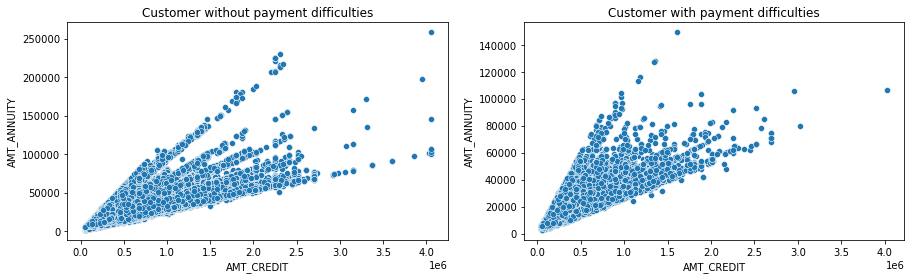

In [66]:
#AMT_ANNUITY V/S AMT_CREDIT
plt.figure(figsize=(15,4)) 

plt.subplot(1,2,1)
sns.scatterplot(data=target0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
sns.scatterplot(data=target1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')

plt.show()

- We see a positive correlation between Amt_Credit and Amt_annuity in both the graphs
- For customers with payment difficulties, for same credit amount as compared to customers without payment difficulties, the annuity amount seems to be more and hence can be the reason for defaulting. 

### Bivariate Analysis of categorical columns

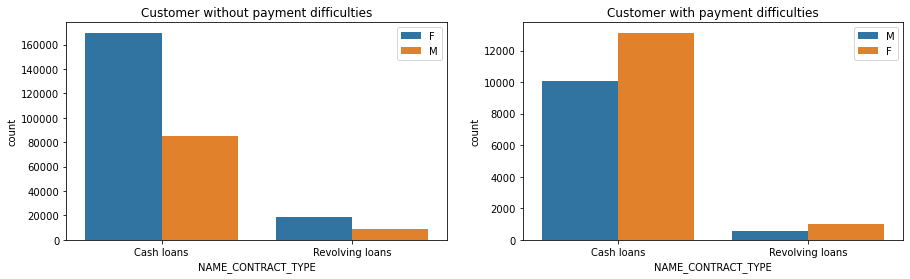

In [67]:
#CONTRACT TYPE V/S GENDER OF CLIENT
plt.figure(figsize=(15,4)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=target0,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=target1,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

- Here we compare gender of client and the preference of the contract type. 
- In both the cases whether clients have difficulty in payment or not they prefer Cash Loans. 
- And across both types of clients, for males taking cash loans the ratio of clients without payment difficulties:client with payment difficulties is 8:1 approx while for females taking cash loans the ratio is higher i.e. 13:1 approx. Hence for cash loans, males are likely to default than females. 
- Similarly for revolving loans, ratio is lower for males than females and hence males are likely to default.

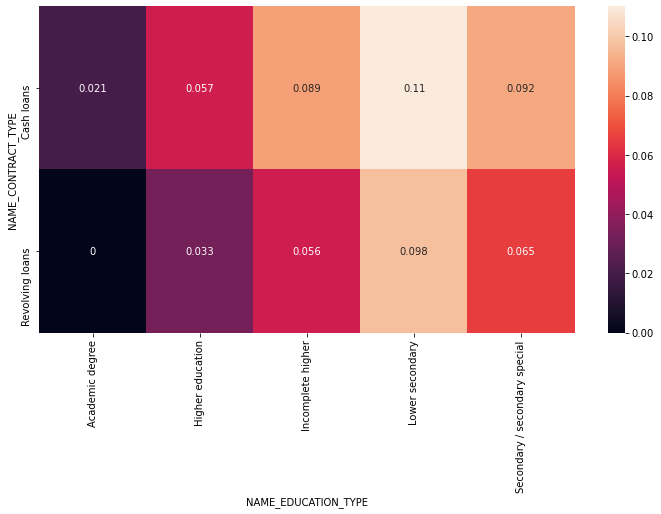

In [68]:
plt.figure(figsize=[12,6])
contract_edu = pd.pivot_table(data=appl1,values="TARGET",index="NAME_CONTRACT_TYPE", columns="NAME_EDUCATION_TYPE")
sns.heatmap(contract_edu, annot=True)
plt.show()

- From the plot above we can observe that clients with Lower secondary and cash loans have highest probability of defaulting while Academic degree holders and revolving loans have no defaulters
- Academic degree holders have the lowest chance of defaulting across all education groups

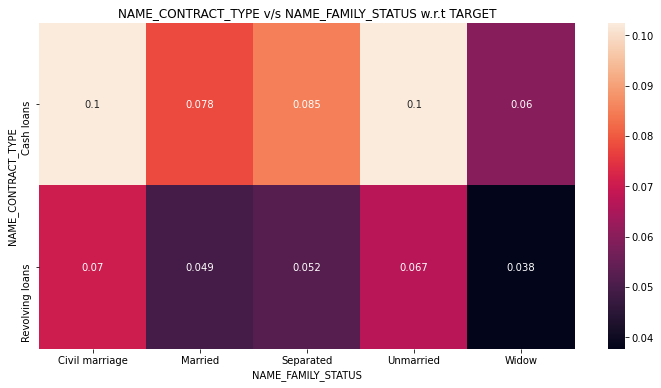

In [69]:
plt.figure(figsize=[12,6])
family_contract = pd.pivot_table(data=appl1,values="TARGET",index="NAME_CONTRACT_TYPE", columns="NAME_FAMILY_STATUS")
sns.heatmap(family_contract, annot=True)
plt.title("NAME_CONTRACT_TYPE v/s NAME_FAMILY_STATUS w.r.t TARGET")
plt.show()

- From the above plot, in cash loans, civil marriage and unmarried people have higher chance of defaulting, while in revolving loans, married and widowed clients have lowest chance of defaulting.
- For widows, for both cash and revolving loans, they are able to pay on time. 
- For civil marriage and unmarried, for both cash and revolving loans, they have difficulty in payment of loans on time.

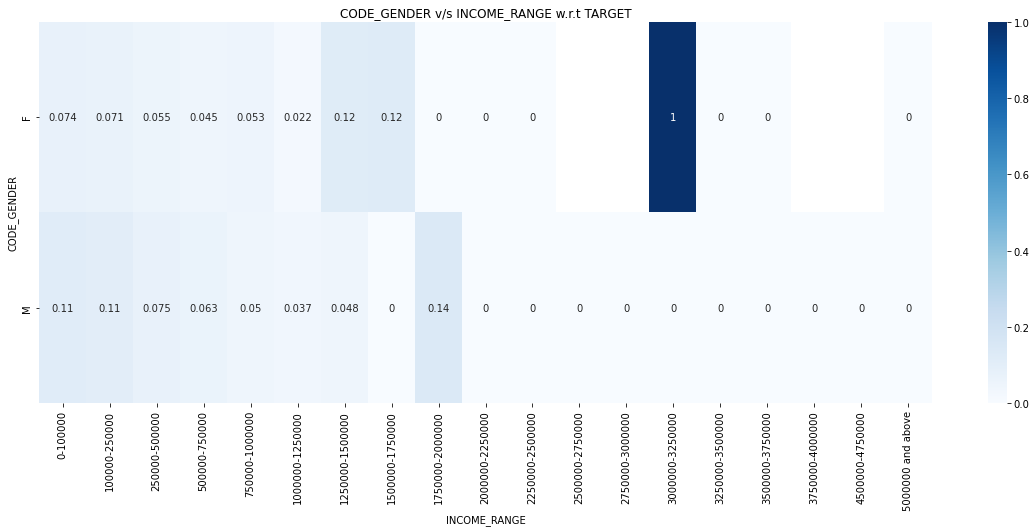

In [70]:
plt.figure(figsize=[20,7])
income_gender = pd.pivot_table(data=appl1,values="TARGET",index="CODE_GENDER",columns="INCOME_RANGE")
sns.heatmap(income_gender,annot=True,cmap="Blues")
plt.title("CODE_GENDER v/s INCOME_RANGE w.r.t TARGET")
plt.show()

- Generally got higher income ranges, for both genders, the customers have no diffculty in paying loans on time except 1 exception
- If we see that the lowest income ranges, customers of both genders have highest diffculty in paying the loans on time.

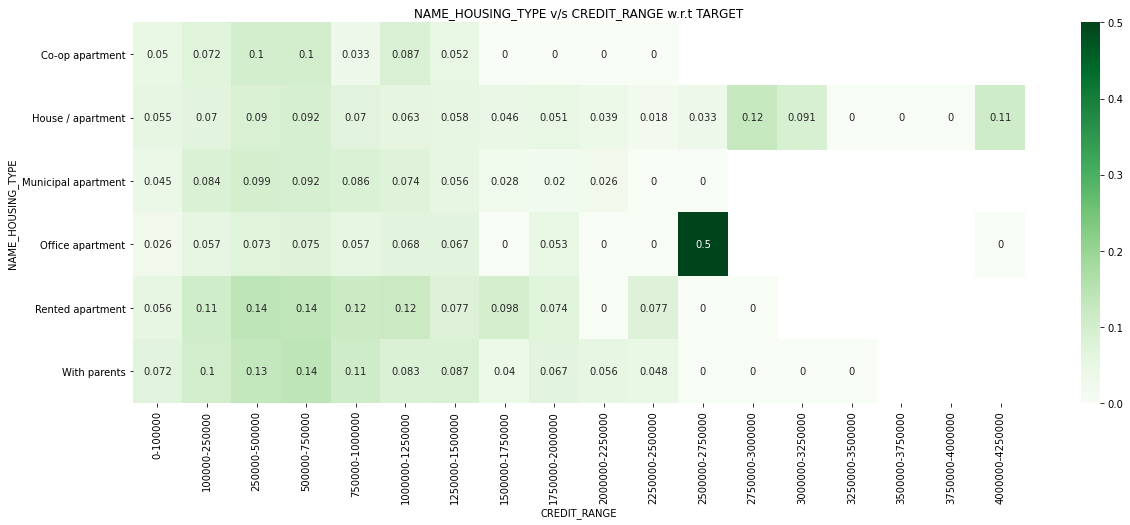

In [71]:
plt.figure(figsize=[20,7])
credit_housingtype = pd.pivot_table(data=appl1,values="TARGET",index="NAME_HOUSING_TYPE",columns="CREDIT_RANGE")
sns.heatmap(credit_housingtype,annot=True,cmap="Greens")
plt.title("NAME_HOUSING_TYPE v/s CREDIT_RANGE w.r.t TARGET")
plt.show()

- The customers living in office apartment and credit range 2500000 - 2750000 have the highest chance of defaulting
- For people usually living in house/apartment, for all credit ranges, there are some defaulters. 
- For credit ranges 250000 - 1000000, there are more defaulters as compared to other credit ranges

### Bivariate analysis of numerical-categorical features

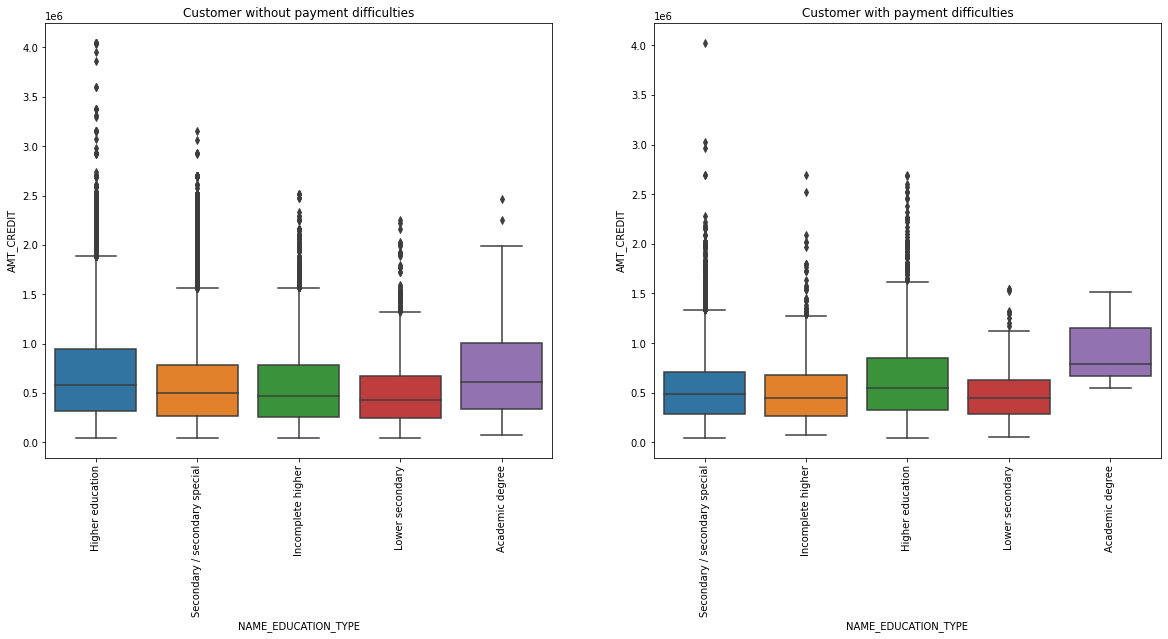

In [72]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

- For Academic degree holders, the median is on the higher side which means they tend to take more credit amount. 

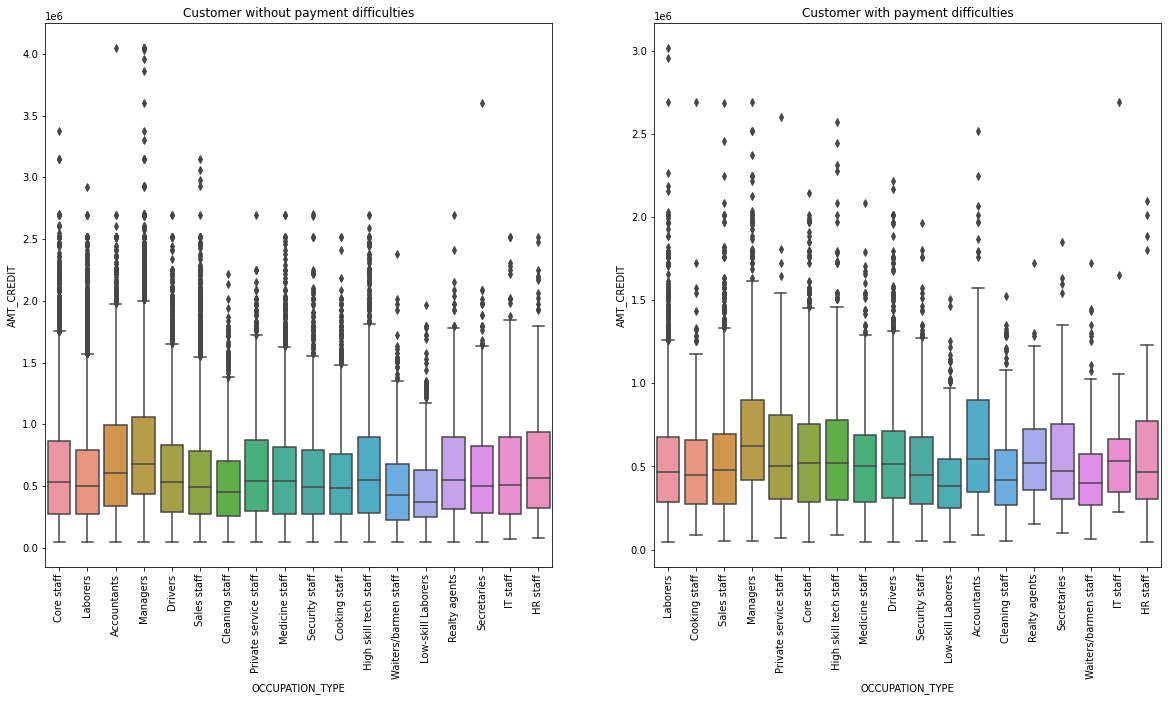

In [73]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.boxplot(data=target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

- Managers and Accountants usually take higher credit amount.
- Low skilled labourers usually take lower credit amount

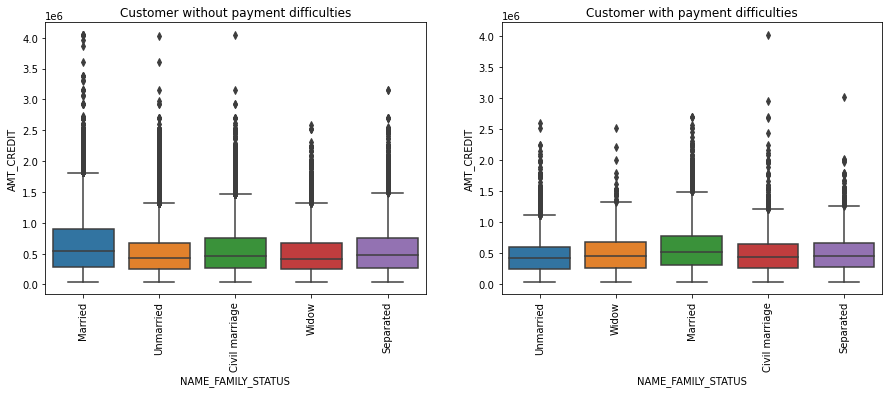

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(data=target0,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

- After plotting a boxplot comparing the credit amount and family status of the client we can conclude that clients have no payment difficulties tend to have more credit amount if they are married or seperated.

## Correlation between numeric columns and top 10 correlations

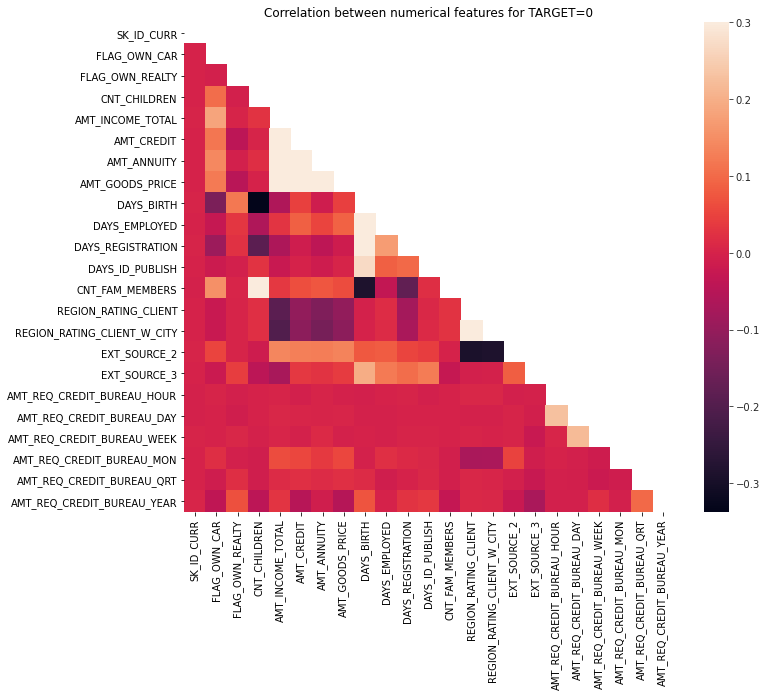

In [75]:
corr0 = target0.corr().drop("TARGET",axis=1).drop("TARGET",axis=0)
mask = np.zeros_like(corr0)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr0, mask=mask, vmax=.3,square=True)
    plt.title("Correlation between numerical features for TARGET=0")

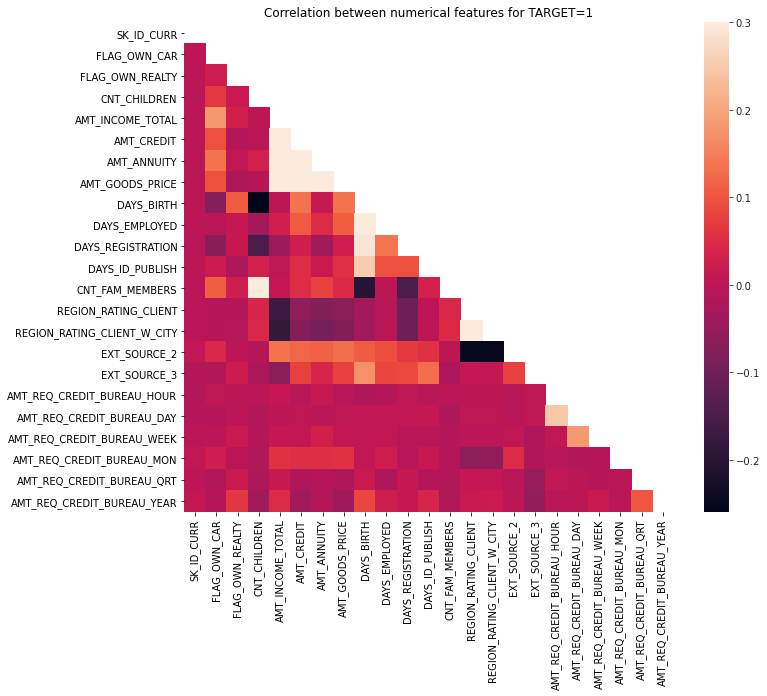

In [76]:
corr1 = target1.corr().drop("TARGET",axis=1).drop("TARGET",axis=0)
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=mask, vmax=.3,square=True)
    plt.title("Correlation between numerical features for TARGET=1")

In [77]:
# Top 10 correlations for target=0
corr0 = target0.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
print("Top 10 Correlations for TARGET=0")
corr_df0.head(10)

Top 10 Correlations for TARGET=0


,VAR1,VAR2,Correlation_Value,Corr_abs
198,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
374,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950123,0.950123
316,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878563,0.878563
199,AMT_GOODS_PRICE,AMT_ANNUITY,0.776688,0.776688
174,AMT_ANNUITY,AMT_CREDIT,0.771114,0.771114
173,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418746,0.418746
249,DAYS_EMPLOYED,DAYS_BIRTH,0.352591,0.352591
197,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349451,0.349451
149,AMT_CREDIT,AMT_INCOME_TOTAL,0.342570,0.342570
220,DAYS_BIRTH,CNT_CHILDREN,-0.337088,0.337088


- If we see most of the top 10 correlations are pretty obvious. For example
    - AMT_GOOD_PRICE and AMT_CREDIT :- For consumer loans the credit amount is equal to the goods price and hence they will be almost equal
    - CNT_FAM_MEMBERS and CNT_CHILDREN :- The family members include the count of children, hence a linear relationship between them
    - AMT_ANNUITY and AMT_CREDIT :- Greater the amount of credit, greater will be the amount of annuity most of the times.
    - DAYS_EMPLOYED and DAYS_BIRTH	:- Greater the age, the work experience tends to increase.
- The correlations that matter will be the ones after these top 10 correlations where it isn't obvious.

In [78]:
# Top 10 correlations for target=1
corr1 = target1.corr()
corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df1['Corr_abs'] = abs(corr_df1['Correlation_Value'])
corr_df1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
print("Top 10 Correlations for TARGET=1")
corr_df1.head(10)

Top 10 Correlations for TARGET=1


,VAR1,VAR2,Correlation_Value,Corr_abs
198,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
374,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956625,0.956625
316,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885504,0.885504
199,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
174,AMT_ANNUITY,AMT_CREDIT,0.751957,0.751957
173,AMT_ANNUITY,AMT_INCOME_TOTAL,0.397914,0.397914
197,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.327484,0.327484
149,AMT_CREDIT,AMT_INCOME_TOTAL,0.325044,0.325044
249,DAYS_EMPLOYED,DAYS_BIRTH,0.307006,0.307006
273,DAYS_REGISTRATION,DAYS_BIRTH,0.289080,0.289080


- Similar kinds of insights can be drawn for target1 data as done in target0 

## Previous application data

In [79]:
prev_appl = pd.read_csv("previous_application.csv")

In [80]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [82]:
prev_appl.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [83]:
prev_appl.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

Since unique values of SK_ID_PREV is equal to the length of previous_application data, but there are duplicate values of SK_ID_CURR(338857) which means that a particular person has taken multiple loans previously.

### Cleaning previous_application data

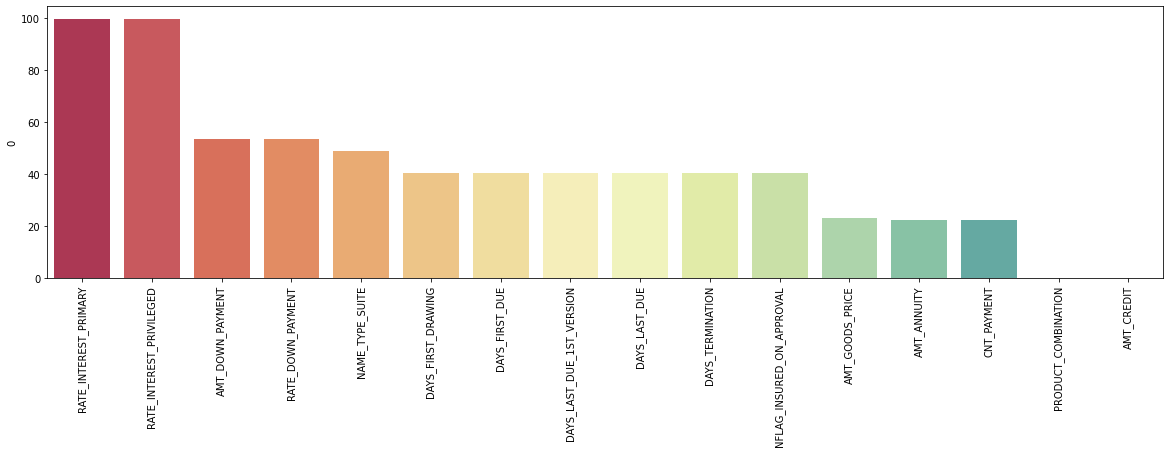

In [84]:
#Plotting columns with percentage of null values
nulls_prev_appl = (prev_appl.isnull().sum()* 100/len(prev_appl)).to_frame()
nulls_prev_appl = nulls_prev_appl[nulls_prev_appl[0]>0]
nulls_prev_appl.sort_values(by=0,ascending=False,inplace=True)
plt.figure(figsize=[20,5])
barp = sns.barplot(data=nulls_prev_appl,x=nulls_prev_appl.index,y=nulls_prev_appl[0],palette="Spectral")
for item in barp.get_xticklabels():
    item.set_rotation(90)

In [85]:
#checking and removing cols with null percentage >40%
prev_appl.drop(nulls_prev_appl[nulls_prev_appl[0]>40].index,axis=1,inplace=True)

In [86]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [87]:
prev_appl.NAME_CONTRACT_TYPE.value_counts()
prev_appl.loc[prev_appl.NAME_CONTRACT_TYPE == "XNA","NAME_CONTRACT_TYPE"] = np.NaN
prev_appl.NAME_CONTRACT_TYPE.isnull().sum() *100/len(prev_appl)

# We will treat the null values as missing only.

0.02071590826085759

In [88]:
prev_appl.NAME_CASH_LOAN_PURPOSE.value_counts()
prev_appl.loc[prev_appl.NAME_CASH_LOAN_PURPOSE == "XNA","NAME_CASH_LOAN_PURPOSE"] = np.NaN
prev_appl.loc[prev_appl.NAME_CASH_LOAN_PURPOSE == "XAP","NAME_CASH_LOAN_PURPOSE"] = np.NaN
prev_appl.NAME_CASH_LOAN_PURPOSE.isnull().sum() *100/len(prev_appl)

#Even though NAME_CASH_LOAN_PURPOSE is an important attribute but there are too many missing values and hence we should drop this column altogether
prev_appl.drop("NAME_CASH_LOAN_PURPOSE",axis=1,inplace=True)

In [89]:
prev_appl.NAME_PAYMENT_TYPE.value_counts()
prev_appl.loc[prev_appl.NAME_PAYMENT_TYPE == "XNA","NAME_PAYMENT_TYPE"] = np.NaN
prev_appl.NAME_PAYMENT_TYPE.value_counts()
prev_appl.NAME_PAYMENT_TYPE.isnull().sum() *100/len(prev_appl)

# We will treat the null values as missing only.

37.56309071771641

In [90]:
prev_appl.CODE_REJECT_REASON.value_counts()
prev_appl.loc[prev_appl.CODE_REJECT_REASON == "XNA","CODE_REJECT_REASON"] = np.NaN
prev_appl.loc[prev_appl.CODE_REJECT_REASON == "XAP","CODE_REJECT_REASON"] = np.NaN
prev_appl.CODE_REJECT_REASON.isnull().sum() *100/len(prev_appl)

#Even though CODE_REJECT_REASON is an important attribute but there are too many missing values and hence we should drop this column altogether
prev_appl.drop("CODE_REJECT_REASON",axis=1,inplace=True)

In [91]:
prev_appl.NAME_CLIENT_TYPE.value_counts()
prev_appl.loc[prev_appl.NAME_CLIENT_TYPE == "XNA","NAME_CLIENT_TYPE"] = np.NaN
prev_appl.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [92]:
prev_appl.NAME_GOODS_CATEGORY.value_counts()
prev_appl.loc[prev_appl.NAME_GOODS_CATEGORY == "XNA","NAME_GOODS_CATEGORY"] = np.NaN
prev_appl.NAME_GOODS_CATEGORY.isnull().sum() *100/len(prev_appl)

#Even though NAME_GOODS_CATEGORY is an important attribute but there are too many missing values and hence we should drop this column altogether
prev_appl.drop("NAME_GOODS_CATEGORY",axis=1,inplace=True)

In [93]:
prev_appl.NAME_PORTFOLIO.value_counts()
prev_appl.loc[prev_appl.NAME_PORTFOLIO == "XNA","NAME_PORTFOLIO"] = np.NaN
prev_appl.NAME_PORTFOLIO.isnull().sum() *100/len(prev_appl)


# We will treat the null values as missing only.

22.286365699245724

In [94]:
prev_appl.NAME_PRODUCT_TYPE.value_counts()
prev_appl.loc[prev_appl.NAME_PRODUCT_TYPE == "XNA","NAME_PRODUCT_TYPE"] = np.NaN
prev_appl.NAME_PRODUCT_TYPE.isnull().sum() *100/len(prev_appl)

#Even though NAME_PRODUCT_TYPE is an important attribute but there are too many missing values and hence we should drop this column altogether
prev_appl.drop("NAME_PRODUCT_TYPE",axis=1,inplace=True)

In [95]:
prev_appl.NAME_SELLER_INDUSTRY.value_counts()
prev_appl.loc[prev_appl.NAME_SELLER_INDUSTRY == "XNA","NAME_SELLER_INDUSTRY"] = np.NaN
prev_appl.NAME_SELLER_INDUSTRY.isnull().sum() *100/len(prev_appl)

#Even though NAME_SELLER_INDUSTRY is an important attribute but there are too many missing values and hence we should drop this column altogether
prev_appl.drop("NAME_SELLER_INDUSTRY",axis=1,inplace=True)

In [96]:
prev_appl.NAME_YIELD_GROUP.value_counts()
prev_appl.loc[prev_appl.NAME_YIELD_GROUP == "XNA","NAME_YIELD_GROUP"] = np.NaN
prev_appl.NAME_YIELD_GROUP.isnull().sum() *100/len(prev_appl)

# We will treat the null values as missing only.

30.96698985878456

In [97]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

### Removing unnecessary/redundant columns

In [98]:
prev_appl.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA'],axis=1,inplace=True)

In [99]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669868 non-null  object 
 3   AMT_ANNUITY           1297979 non-null  float64
 4   AMT_APPLICATION       1670214 non-null  float64
 5   AMT_CREDIT            1670213 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1670214 non-null  object 
 8   NAME_PAYMENT_TYPE     1042830 non-null  object 
 9   NAME_CLIENT_TYPE      1668273 non-null  object 
 10  NAME_PORTFOLIO        1297984 non-null  object 
 11  CHANNEL_TYPE          1670214 non-null  object 
 12  CNT_PAYMENT           1297984 non-null  float64
 13  NAME_YIELD_GROUP      1152999 non-null  object 
 14  PRODUCT_COMBINATION   1669868 non-

### We will remove those clients which are not present in application_data for further analysis

In [100]:
clients_in_current_data = appl1.SK_ID_CURR.unique()
prev_appl = prev_appl[prev_appl.SK_ID_CURR.isin(clients_in_current_data)]
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412326 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1412326 non-null  int64  
 1   SK_ID_CURR            1412326 non-null  int64  
 2   NAME_CONTRACT_TYPE    1412015 non-null  object 
 3   AMT_ANNUITY           1105338 non-null  float64
 4   AMT_APPLICATION       1412326 non-null  float64
 5   AMT_CREDIT            1412325 non-null  float64
 6   AMT_GOODS_PRICE       1093093 non-null  float64
 7   NAME_CONTRACT_STATUS  1412326 non-null  object 
 8   NAME_PAYMENT_TYPE     889843 non-null   object 
 9   NAME_CLIENT_TYPE      1410785 non-null  object 
 10  NAME_PORTFOLIO        1105343 non-null  object 
 11  CHANNEL_TYPE          1412326 non-null  object 
 12  CNT_PAYMENT           1105343 non-null  float64
 13  NAME_YIELD_GROUP      983526 non-null   object 
 14  PRODUCT_COMBINATION   1412015 non-

## Univariate Analysis

### Univariate analysis of categorical features

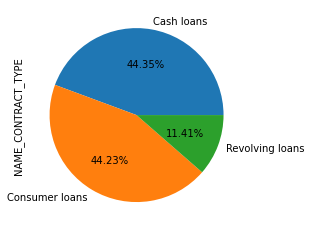

In [101]:
prev_appl.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.2f%%")
plt.show()

- Cash and consumer loans are preferred over revolving loans in previous data as well

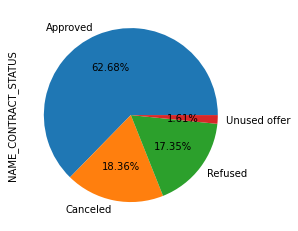

In [102]:
prev_appl.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = "%1.2f%%")
plt.show()

- Majority of the loans have been approved but a significant portion belongs to Cancelled and Refused category

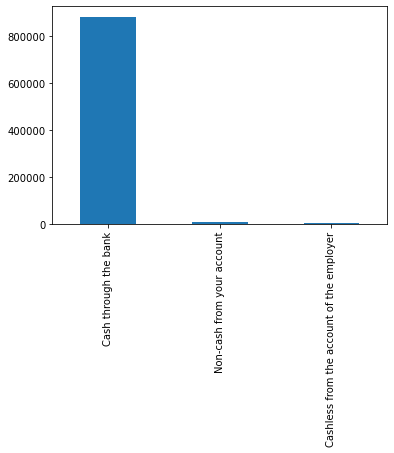

In [103]:
prev_appl.NAME_PAYMENT_TYPE.value_counts().plot.bar()
plt.show()

- Cash through the bank is the most preferred method of paying loans

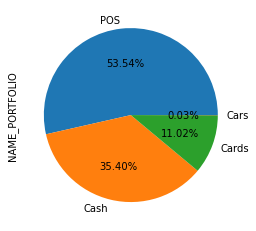

In [104]:
prev_appl.NAME_PORTFOLIO.value_counts().plot.pie(autopct = "%1.2f%%")
plt.show()

- Cash and POS form the majority reasons for the previous loans

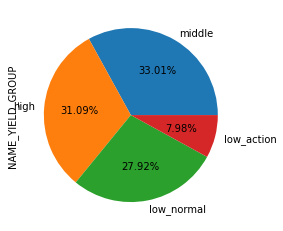

In [105]:
prev_appl.NAME_YIELD_GROUP.value_counts().plot.pie(autopct = "%1.2f%%")
plt.show()

- Grouped interest rates have been equally distributed approximately between high, middle and low_normal

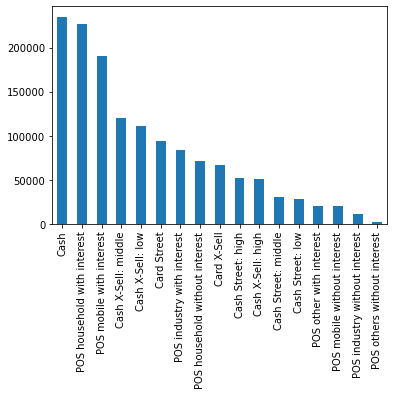

In [106]:
prev_appl.PRODUCT_COMBINATION.value_counts().plot.bar()
plt.show()


### Univariate analysis of numerical features

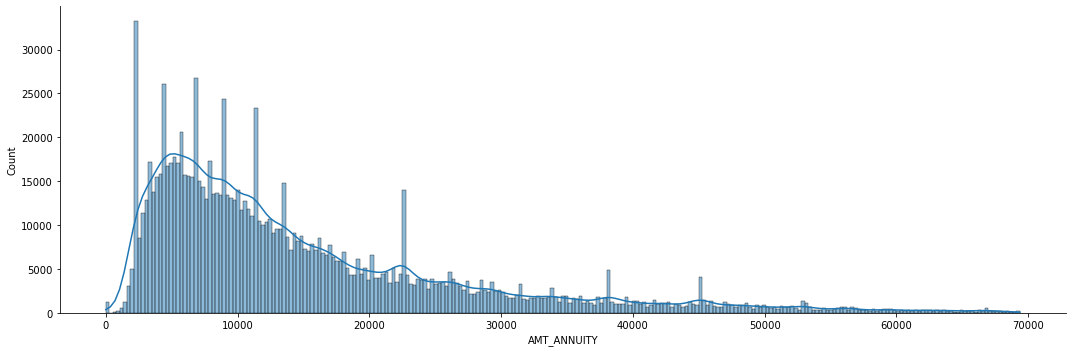

In [107]:
pl = pd.DataFrame()
pl["AMT_ANNUITY"] = prev_appl[prev_appl.AMT_ANNUITY<prev_appl.AMT_ANNUITY.quantile([0.99]).values[0]].AMT_ANNUITY
sns.displot(data=pl,x="AMT_ANNUITY",kde=True,aspect=3)
plt.show()

- AMT_ANNUITY follows a skewed normal distribution
- The AMT_ANNUITY is concentrated on the lower side of range 3400-60000

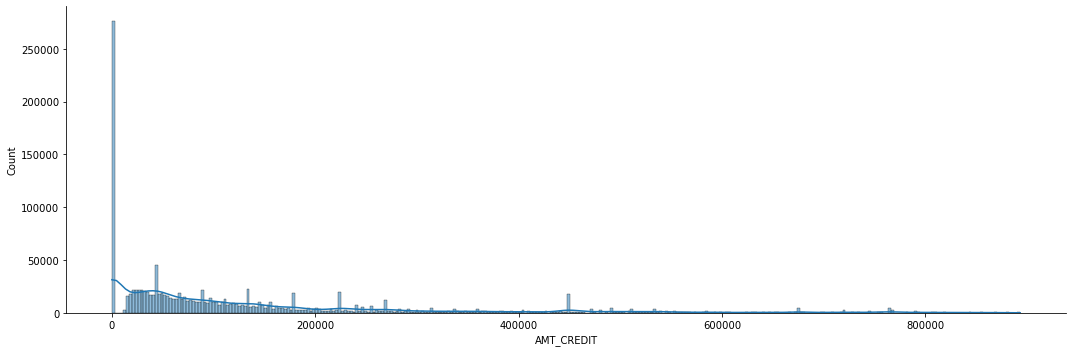

In [108]:
#Restricting values for better visualization
pl = pd.DataFrame()
pl["AMT_CREDIT"] =  prev_appl[prev_appl.AMT_CREDIT<prev_appl.AMT_CREDIT.quantile([0.95]).values[0]].AMT_CREDIT
sns.displot(data=pl,x="AMT_CREDIT",kde=True,aspect=3)
plt.show()

- AMT_CREDIT in previous applications follow the same graph as the AMT_credit in current application data

### Merging the previous_application data with application_data

In [109]:
merge_appl=appl1.merge(prev_appl,how='inner', left_on='SK_ID_CURR',right_on='SK_ID_CURR',suffixes=(None,'_prev'))
merge_appl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412326 entries, 0 to 1412325
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1412326 non-null  int64   
 1   TARGET                       1412326 non-null  int64   
 2   NAME_CONTRACT_TYPE           1412326 non-null  object  
 3   CODE_GENDER                  1412326 non-null  object  
 4   FLAG_OWN_CAR                 1412326 non-null  int64   
 5   FLAG_OWN_REALTY              1412326 non-null  int64   
 6   CNT_CHILDREN                 1412326 non-null  int64   
 7   AMT_INCOME_TOTAL             1412326 non-null  float64 
 8   AMT_CREDIT                   1412326 non-null  float64 
 9   AMT_ANNUITY                  1412326 non-null  float64 
 10  AMT_GOODS_PRICE              1412326 non-null  float64 
 11  NAME_INCOME_TYPE             1412326 non-null  object  
 12  NAME_EDUCATION_TYPE         

In [110]:
merge_appl

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,179055.0,179055.0,Approved,NaN,New,POS,Stone,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,1035882.0,900000.0,Approved,NaN,Repeater,Cash,Credit and cash offices,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,348637.5,337500.0,Approved,Cash through the bank,Refreshed,POS,Stone,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,68053.5,68809.5,Approved,Cash through the bank,Refreshed,POS,Country-wide,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,20106.0,24282.0,Approved,Cash through the bank,New,POS,Regional / Local,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412321,456255,0,Cash loans,F,0,0,0,157500.0,675000.0,49117.5,...,254340.0,229500.0,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,24.0,middle,Cash X-Sell: middle
1412322,456255,0,Cash loans,F,0,0,0,157500.0,675000.0,49117.5,...,45000.0,45000.0,Refused,NaN,Repeater,Cards,Country-wide,0.0,NaN,Card Street
1412323,456255,0,Cash loans,F,0,0,0,157500.0,675000.0,49117.5,...,1067940.0,765000.0,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,60.0,low_normal,Cash Street: low
1412324,456255,0,Cash loans,F,0,0,0,157500.0,675000.0,49117.5,...,1271929.5,1170000.0,Approved,Cash through the bank,Repeater,Cash,AP+ (Cash loan),36.0,low_normal,Cash X-Sell: low


## Bivariate Analysis

For this, we will divide the dataframe into 4 parts w.r.t NAME_CONTRACT_STATUS i.e. Approved, Canceled, Refused, Unused offer. And then take one feature at a time and plot 4 plots respectively and compare them.

In [111]:
merge_appl['NAME_CONTRACT_STATUS'].value_counts()*100/len(merge_appl)

Approved        62.682412
Canceled        18.358226
Refused         17.348827
Unused offer     1.610535
Name: NAME_CONTRACT_STATUS, dtype: float64

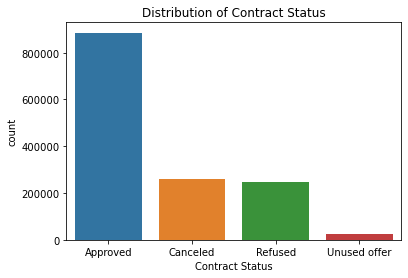

In [112]:
sns.countplot(merge_appl['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [113]:
approved_appl = merge_appl[merge_appl['NAME_CONTRACT_STATUS']=='Approved']
refused_appl= merge_appl[merge_appl['NAME_CONTRACT_STATUS']=='Refused']
canceled_appl = merge_appl[merge_appl['NAME_CONTRACT_STATUS']=='Canceled']
unused_appl= merge_appl[merge_appl['NAME_CONTRACT_STATUS']=='Unused offer']

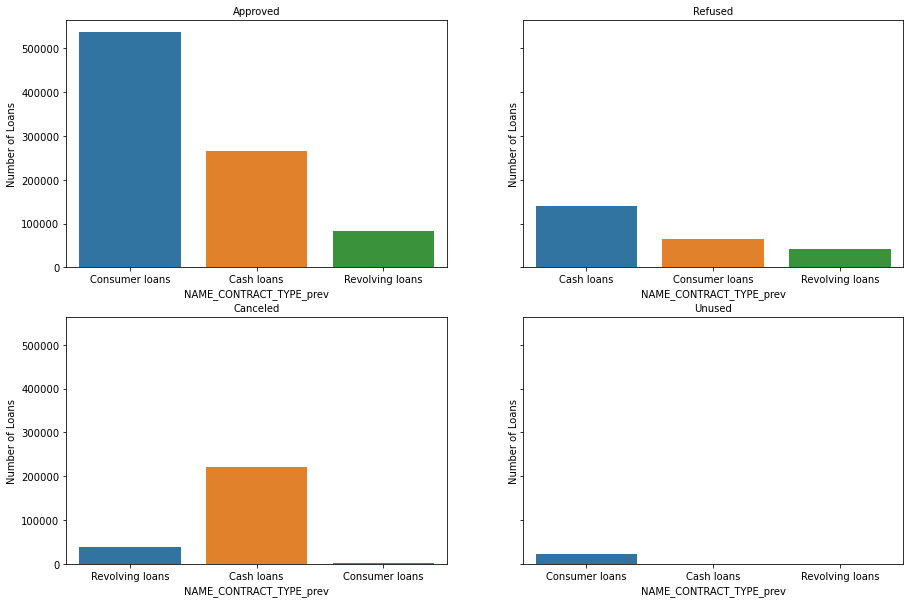

In [114]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

ax1 = sns.countplot(ax=ax1,data=approved_appl,x='NAME_CONTRACT_TYPE_prev')
ax1.set_title("Approved", fontsize=10)
ax1.set_xlabel('NAME_CONTRACT_TYPE_prev')
ax1.set_ylabel("Number of Loans")

ax2 = sns.countplot(ax=ax2,data=refused_appl,x='NAME_CONTRACT_TYPE_prev')
ax2.set_title("Refused", fontsize=10)
ax2.set_xlabel('NAME_CONTRACT_TYPE_prev')
ax2.set_ylabel("Number of Loans")

ax3 = sns.countplot(ax=ax3,data=canceled_appl,x='NAME_CONTRACT_TYPE_prev')
ax3.set_title("Canceled", fontsize=10)
ax3.set_xlabel('NAME_CONTRACT_TYPE_prev')
ax3.set_ylabel("Number of Loans")

ax4 = sns.countplot(ax=ax4,data=unused_appl,x='NAME_CONTRACT_TYPE_prev')
ax4.set_title("Unused", fontsize=10)
ax4.set_xlabel('NAME_CONTRACT_TYPE_prev')
ax4.set_ylabel("Number of Loans")

plt.show()

- Most percentage of consumer loans have been approved as compared to other types of loans
- More cash loans have been canceled or refused than approved

In [115]:
def plotting(col):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_appl,x=col)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel(col)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_appl,x=col)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_xlabel(col)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_appl,x=col)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(col)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_appl,x=col)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(col)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()

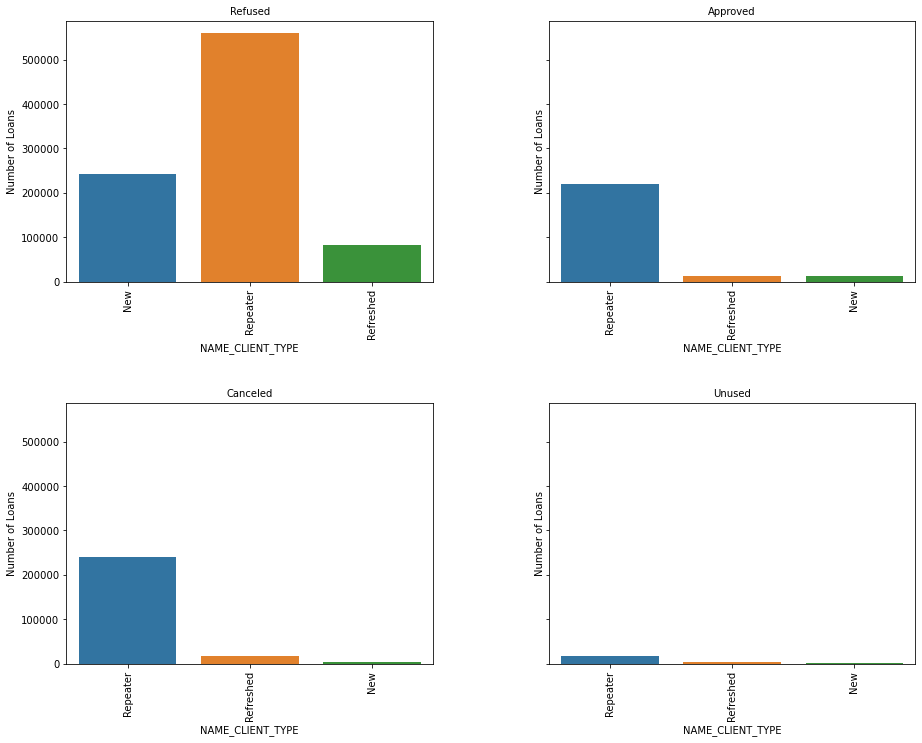

In [116]:
plotting('NAME_CLIENT_TYPE')

- Most of the Repeaters have their loans being refused.
- Very few New applications were approved and most of them were refused

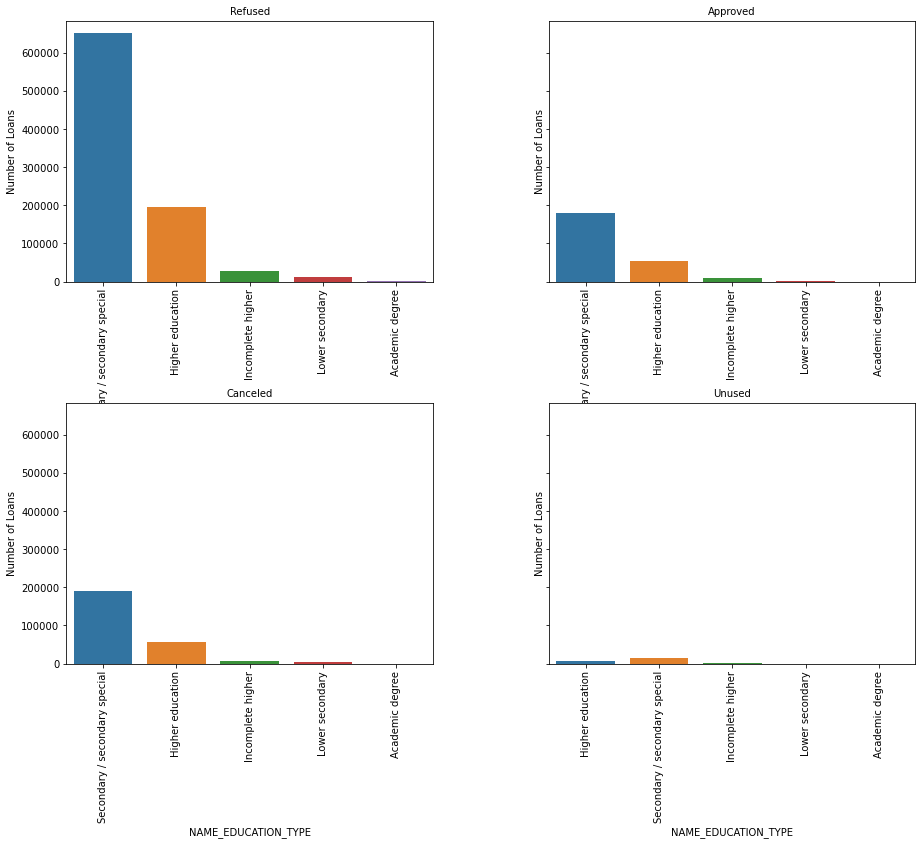

In [117]:
plotting('NAME_EDUCATION_TYPE')

- For Secondary / secondary special people, majority of their loan applications were refused.

## Few Recommendations
- Females usually have taken more loans and pay on time as compared to males. Hence we can promote some special type of loans or lower the interest rates for them
- Those who have Academic degree have higher chance on paying the loans on time. Other education type groups can be scrutinized more carefully. For e.g. for Secondary / secondary special people, majority of their loan applications were refused. 
- Labourers usually take more loans but should be given lower credit amount as they can then have a higher chance of defaulting. While job types like Managers or accountant which are higher in hierarchy can be given higher credit amount
- People with less than 2 children are likely to pay on time. People with more number of children hence should be given loans with lower credit amount or introduce some special type of loans for them to handle such cases.
- Generally people in higher income ranges have lower chance of defaulting than people in lower income ranges. We can promote more loans to people with higher income ranges. 